<a href="https://colab.research.google.com/github/HeHeHuang/DataScientist/blob/main/MayBank_DataScientist_Assessment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Objective: classification task, to predict whether client will default payment next month

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from scipy import stats #for statistic analysis

import warnings
warnings.filterwarnings("ignore") # for ignore warning information
 
%matplotlib inline   

In [2]:
pip install --upgrade xlrd

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 96 kB 2.6 MB/s 
  Attempting uninstall: xlrd
    Found existing installation: xlrd 1.1.0
    Uninstalling xlrd-1.1.0:
      Successfully uninstalled xlrd-1.1.0


In [3]:
df = pd.read_excel('/content/drive/MyDrive/Colab Notebooks/Data_scientist_Assessment.xls',sheet_name='Data',header=1)

In [4]:
pd.set_option('display.max_columns', None)   # to see all column

## Data Understanding

### Statistical analysis

In [5]:
df.columns = df.columns.str.replace('default payment next month', 'Default')

Task: change Age position 

In [6]:
df.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,Default
0,1,20000,2,2,1,24,2,2,-1,-1,-2,-2,3913,3102,689,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,0,2,2682,1725,2682,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,0,0,29239,14027,13559,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,0,0,46990,48233,49291,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,-1,0,-1,0,0,0,8617,5670,35835,20940,19146,19131,2000,36681,10000,9000,689,679,0


* 25 columns with 24 features
* 30000 rows

In [7]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   ID         30000 non-null  int64
 1   LIMIT_BAL  30000 non-null  int64
 2   SEX        30000 non-null  int64
 3   EDUCATION  30000 non-null  int64
 4   MARRIAGE   30000 non-null  int64
 5   AGE        30000 non-null  int64
 6   PAY_0      30000 non-null  int64
 7   PAY_2      30000 non-null  int64
 8   PAY_3      30000 non-null  int64
 9   PAY_4      30000 non-null  int64
 10  PAY_5      30000 non-null  int64
 11  PAY_6      30000 non-null  int64
 12  BILL_AMT1  30000 non-null  int64
 13  BILL_AMT2  30000 non-null  int64
 14  BILL_AMT3  30000 non-null  int64
 15  BILL_AMT4  30000 non-null  int64
 16  BILL_AMT5  30000 non-null  int64
 17  BILL_AMT6  30000 non-null  int64
 18  PAY_AMT1   30000 non-null  int64
 19  PAY_AMT2   30000 non-null  int64
 20  PAY_AMT3   30000 non-null  int64
 21  PAY_AMT4   3

In [8]:
df.describe()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,Default
count,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,3.000000e+04,30000.000000,30000.000000,30000.000000,30000.000000,3.000000e+04,30000.00000,30000.000000,30000.000000,30000.000000,30000.000000
mean,15000.500000,167484.322667,1.603733,1.853133,1.551867,35.485500,-0.016700,-0.133767,-0.166200,-0.220667,-0.266200,-0.291100,51223.330900,49179.075167,4.701315e+04,43262.948967,40311.400967,38871.760400,5663.580500,5.921163e+03,5225.68150,4826.076867,4799.387633,5215.502567,0.221200
std,8660.398374,129747.661567,0.489129,0.790349,0.521970,9.217904,1.123802,1.197186,1.196868,1.169139,1.133187,1.149988,73635.860576,71173.768783,6.934939e+04,64332.856134,60797.155770,59554.107537,16563.280354,2.304087e+04,17606.96147,15666.159744,15278.305679,17777.465775,0.415062
min,1.000000,10000.000000,1.000000,0.000000,0.000000,21.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,-165580.000000,-69777.000000,-1.572640e+05,-170000.000000,-81334.000000,-339603.000000,0.000000,0.000000e+00,0.00000,0.000000,0.000000,0.000000,0.000000
25%,7500.750000,50000.000000,1.000000,1.000000,1.000000,28.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,3558.750000,2984.750000,2.666250e+03,2326.750000,1763.000000,1256.000000,1000.000000,8.330000e+02,390.00000,296.000000,252.500000,117.750000,0.000000
50%,15000.500000,140000.000000,2.000000,2.000000,2.000000,34.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,22381.500000,21200.000000,2.008850e+04,19052.000000,18104.500000,17071.000000,2100.000000,2.009000e+03,1800.00000,1500.000000,1500.000000,1500.000000,0.000000
75%,22500.250000,240000.000000,2.000000,2.000000,2.000000,41.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,67091.000000,64006.250000,6.016475e+04,54506.000000,50190.500000,49198.250000,5006.000000,5.000000e+03,4505.00000,4013.250000,4031.500000,4000.000000,0.000000
max,30000.000000,1000000.000000,2.000000,6.000000,3.000000,79.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,964511.000000,983931.000000,1.664089e+06,891586.000000,927171.000000,961664.000000,873552.000000,1.684259e+06,896040.00000,621000.000000,426529.000000,528666.000000,1.000000


### Summary of Data
* Id will not be used in analysis
* For Education: min value is 0,max value is 6 this is outliner
* For Marriage: min value is 0, this is outliner
* range of age: 21-79
* Pay_0 got -2 value 
* Bill: got negative value.by right should be positive value 
* payment: 0-896040.00000

### EDA 

#### check duplicate

In [180]:
duplicateRows = df[df.duplicated()]
duplicateRows.count()

ID           0
LIMIT_BAL    0
SEX          0
EDUCATION    0
MARRIAGE     0
            ..
PAY_6_4      0
PAY_6_5      0
PAY_6_6      0
PAY_6_7      0
PAY_6_8      0
Length: 92, dtype: int64

#### check Missing Value

In [ ]:
percentage_of_null_values = ((df.isnull().sum())*100/len(df)).sort_values(ascending = False)
percentage_of_null_values

ID           0.0
BILL_AMT2    0.0
PAY_AMT6     0.0
PAY_AMT5     0.0
PAY_AMT4     0.0
PAY_AMT3     0.0
PAY_AMT2     0.0
PAY_AMT1     0.0
BILL_AMT6    0.0
BILL_AMT5    0.0
BILL_AMT4    0.0
BILL_AMT3    0.0
BILL_AMT1    0.0
LIMIT_BAL    0.0
PAY_6        0.0
PAY_5        0.0
PAY_4        0.0
PAY_3        0.0
PAY_2        0.0
PAY_0        0.0
AGE          0.0
MARRIAGE     0.0
EDUCATION    0.0
SEX          0.0
Default      0.0
dtype: float64

In [9]:
df.columns.tolist()

['ID',
 'LIMIT_BAL',
 'SEX',
 'EDUCATION',
 'MARRIAGE',
 'AGE',
 'PAY_0',
 'PAY_2',
 'PAY_3',
 'PAY_4',
 'PAY_5',
 'PAY_6',
 'BILL_AMT1',
 'BILL_AMT2',
 'BILL_AMT3',
 'BILL_AMT4',
 'BILL_AMT5',
 'BILL_AMT6',
 'PAY_AMT1',
 'PAY_AMT2',
 'PAY_AMT3',
 'PAY_AMT4',
 'PAY_AMT5',
 'PAY_AMT6',
 'Default']

#### Limit_Bal with Default

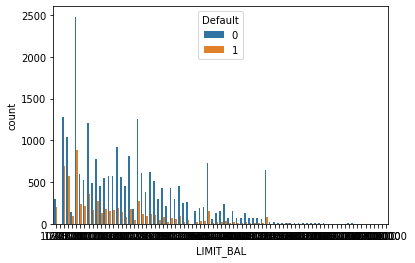

In [10]:
sns.countplot(x='LIMIT_BAL',hue='Default',data = df)

In [11]:
segments=pd.cut(df['LIMIT_BAL'],10,right=False)

In [12]:
counts=pd.value_counts(segments,sort=False)

In [13]:
counts

[10000.0, 109000.0)      12498
[109000.0, 208000.0)      7880
[208000.0, 307000.0)      5059
[307000.0, 406000.0)      2759
[406000.0, 505000.0)      1598
[505000.0, 604000.0)       127
[604000.0, 703000.0)        56
[703000.0, 802000.0)        22
[802000.0, 901000.0)         0
[901000.0, 1000990.0)        1
Name: LIMIT_BAL, dtype: int64

In [14]:
limit_bal_no_default=df.groupby(df['LIMIT_BAL'][df['Default']==0]).size().reset_index(name='not default')
limit_bal_default=df.groupby(df['LIMIT_BAL'][df['Default']==1]).size().reset_index(name='default')
limit_bal_total=df.groupby(df['LIMIT_BAL']).size().reset_index(name='total')
limit_bal=limit_bal_no_default.join(limit_bal_default.set_index('LIMIT_BAL'),on='LIMIT_BAL').join(limit_bal_total.set_index('LIMIT_BAL'),on='LIMIT_BAL') 
limit_bal.head()

,LIMIT_BAL,not default,default,total
0,10000.0,296,197.0,493
1,16000.0,2,NaN,2
2,20000.0,1278,698.0,1976
3,30000.0,1042,568.0,1610
4,40000.0,138,92.0,230


In [15]:
limit_bal

,LIMIT_BAL,not default,default,total
0,10000.0,296,197.0,493
1,16000.0,2,NaN,2
2,20000.0,1278,698.0,1976
3,30000.0,1042,568.0,1610
4,40000.0,138,92.0,230
...,...,...,...,...
75,750000.0,4,NaN,4
76,760000.0,1,NaN,1
77,780000.0,2,NaN,2
78,800000.0,2,NaN,2


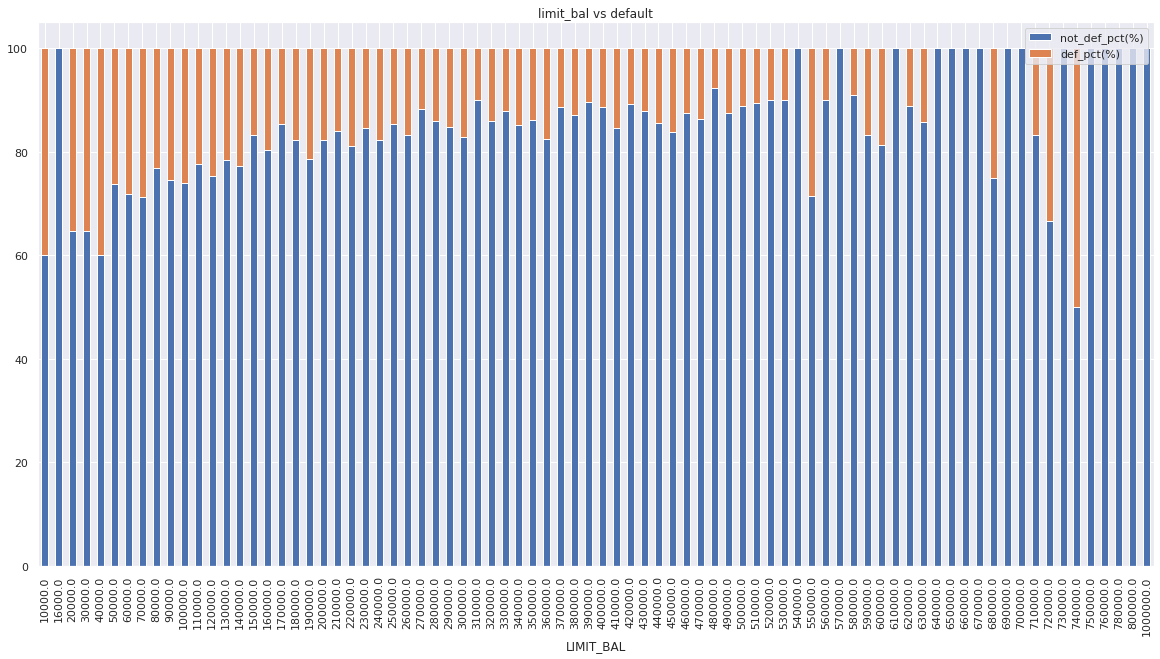

In [16]:
limit_bal['not_def_pct(%)']=round(limit_bal['not default']/limit_bal['total']*100,2)
limit_bal['def_pct(%)']=round(limit_bal['default']/limit_bal['total']*100,2)
limitbal=limit_bal.iloc[:,[0,4,5]]
sns.set(rc={'figure.figsize':(20,10)})
limitbal.plot(x='LIMIT_BAL',stacked=True,kind='bar',title='limit_bal vs default')

Summary: more limit balance, less default rate

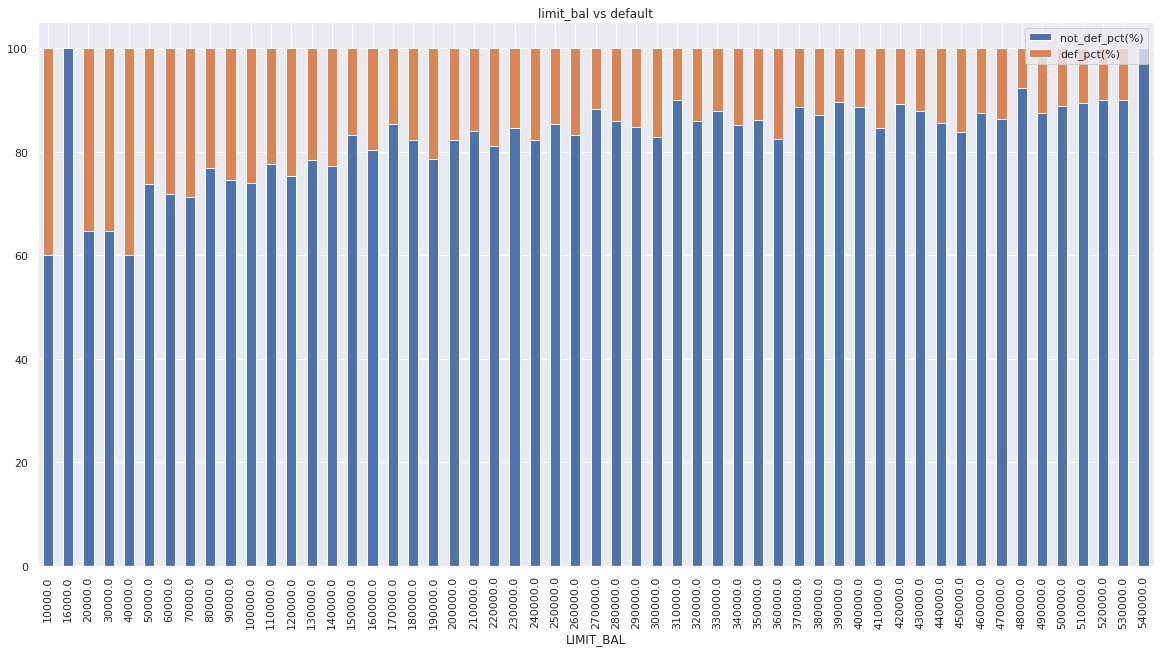

In [17]:
limitbal.query('LIMIT_BAL<550000').plot(x='LIMIT_BAL',stacked=True,kind='bar',title='limit_bal vs default')

In [18]:
limitbal

,LIMIT_BAL,not_def_pct(%),def_pct(%)
0,10000.0,60.04,39.96
1,16000.0,100.00,NaN
2,20000.0,64.68,35.32
3,30000.0,64.72,35.28
4,40000.0,60.00,40.00
...,...,...,...
75,750000.0,100.00,NaN
76,760000.0,100.00,NaN
77,780000.0,100.00,NaN
78,800000.0,100.00,NaN


#### Marriage with Default

In [19]:
#replace outliner 0 to other 3
df['MARRIAGE'] = df['MARRIAGE'].replace(0,3)

In [20]:
marriage_no_default = df.groupby(df['MARRIAGE'][df['Default']==0]).size().reset_index(name='not default')
marriage_default = df.groupby(df['MARRIAGE'][df['Default']==1]).size().reset_index(name='default')
marriage_total = df.groupby(df['MARRIAGE']).size().reset_index(name='total')
marriage_total

,MARRIAGE,total
0,1,13659
1,2,15964
2,3,377


In [21]:
marriage = marriage_no_default.join(marriage_default.set_index('MARRIAGE'),on='MARRIAGE').join(marriage_total.set_index('MARRIAGE'),on='MARRIAGE')
marriage 


,MARRIAGE,not default,default,total
0,1.0,10453,3206,13659
1,2.0,12623,3341,15964
2,3.0,288,89,377


In [22]:
marriage.iloc[:, 0:-1]

,MARRIAGE,not default,default
0,1.0,10453,3206
1,2.0,12623,3341
2,3.0,288,89


[Text(0, 0, 'Married'), Text(0, 0, 'Single'), Text(0, 0, 'Others')]

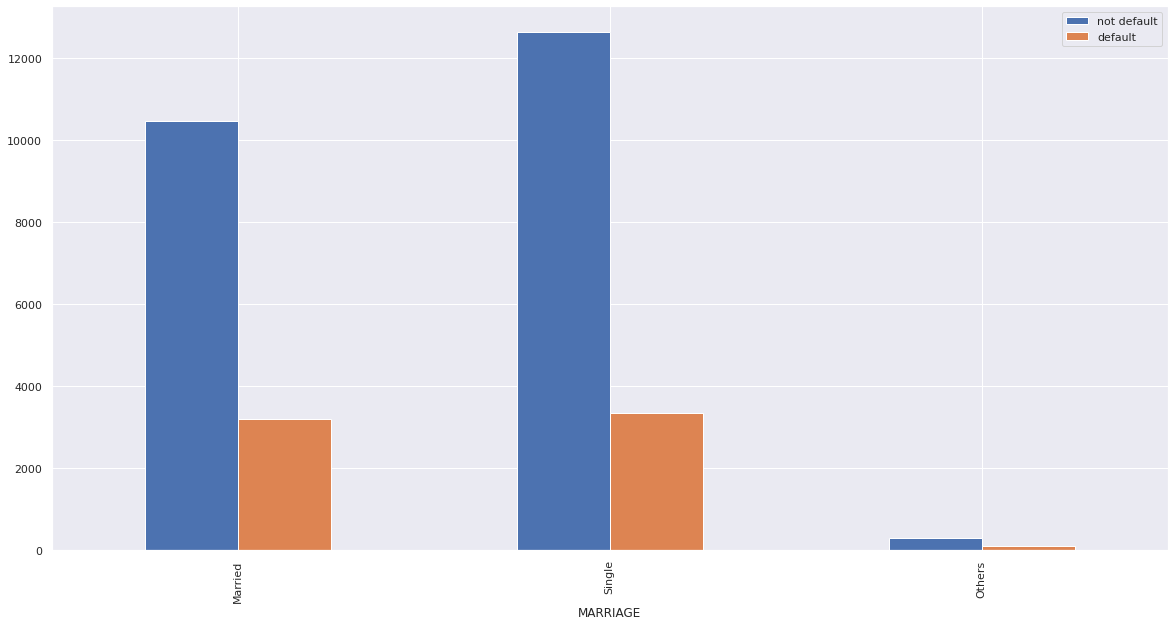

In [23]:
marriage_plot  = marriage.iloc[:, 0:-1].plot(kind='bar',x='MARRIAGE')
marriage_plot.set_xticklabels(['Married','Single','Others'])

Summary: single have the most credit card 

In [24]:
marriage['not default(%)'] = round(marriage['not default']/marriage['total']*100,2)
marriage['default(%)'] = round(marriage['default']/marriage['total']*100,2)


In [25]:
marriage

,MARRIAGE,not default,default,total,not default(%),default(%)
0,1.0,10453,3206,13659,76.53,23.47
1,2.0,12623,3341,15964,79.07,20.93
2,3.0,288,89,377,76.39,23.61


[Text(0, 0, 'Married'), Text(0, 0, 'Single'), Text(0, 0, 'Others')]

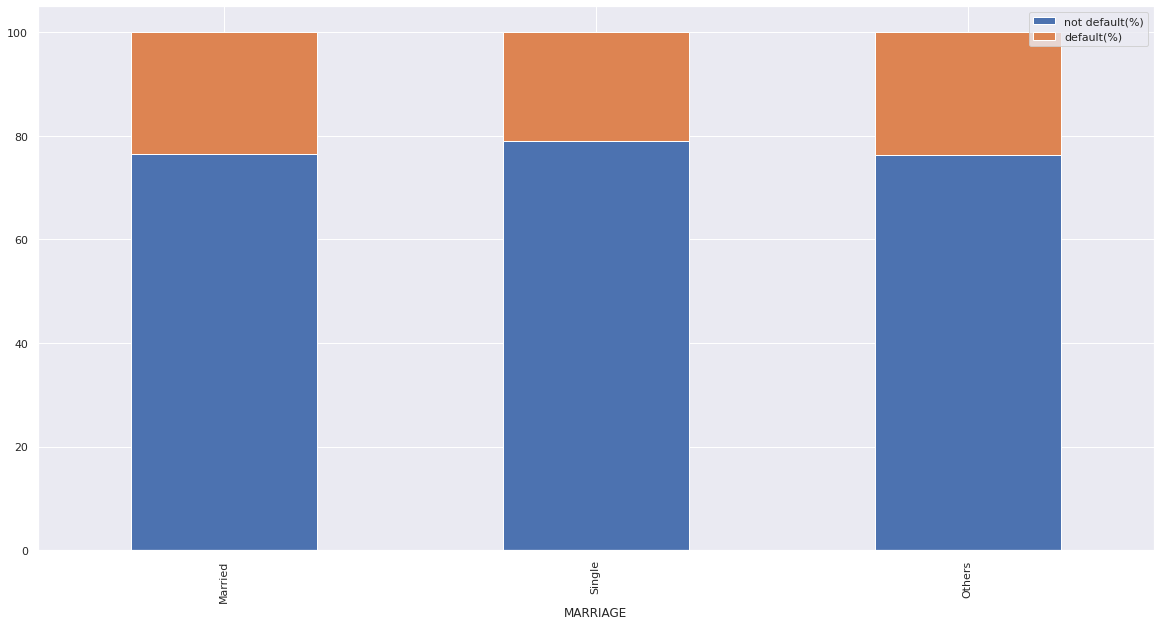

In [26]:
marriage_plot_ = marriage.iloc[:,[0,4,5]].plot(kind='bar',stacked=True,x='MARRIAGE')
marriage_plot_.set_xticklabels(['Married','Single','Others'])

Summary: Default rate, Married person is greater than Single

#### gender with default 

In [27]:
gender_no_default = df.groupby(df['SEX'][df['Default']==0]).size().reset_index(name='not default')
gender_default = df.groupby(df['SEX'][df['Default']==1]).size().reset_index(name='default')
gender_total = df.groupby(df['SEX']).size().reset_index(name='total')
gender_total

,SEX,total
0,1,11888
1,2,18112


In [28]:
gender = gender_no_default.join(gender_default.set_index('SEX'),on = 'SEX').join(gender_total.set_index('SEX'), on = 'SEX')
gender

,SEX,not default,default,total
0,1.0,9015,2873,11888
1,2.0,14349,3763,18112


[Text(0, 0, 'Male'), Text(0, 0, 'Female')]

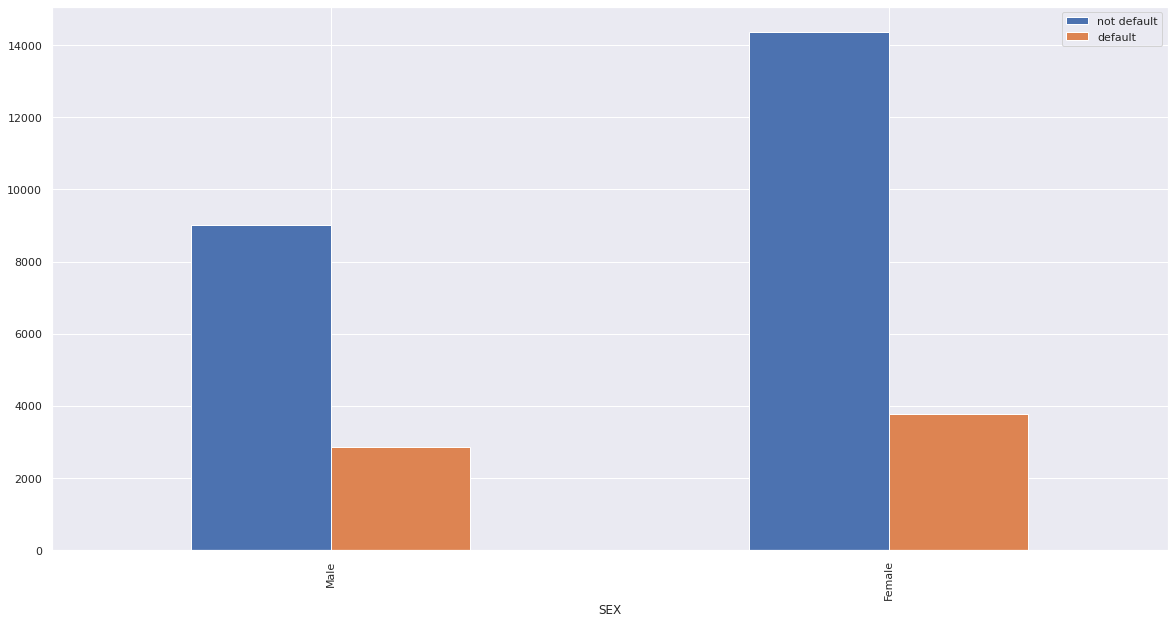

In [29]:
gender_plot = gender.iloc[:,:3].plot(kind='bar',x='SEX')
gender_plot.set_xticklabels(['Male','Female'])


In [30]:
gender['not default(%)'] = round(gender['not default']/gender['total']*100,2)
gender['default(%)'] = round(gender['default']/gender['total']*100,2)

In [31]:
gender

,SEX,not default,default,total,not default(%),default(%)
0,1.0,9015,2873,11888,75.83,24.17
1,2.0,14349,3763,18112,79.22,20.78


[Text(0, 0, 'Male'), Text(0, 0, 'Female')]

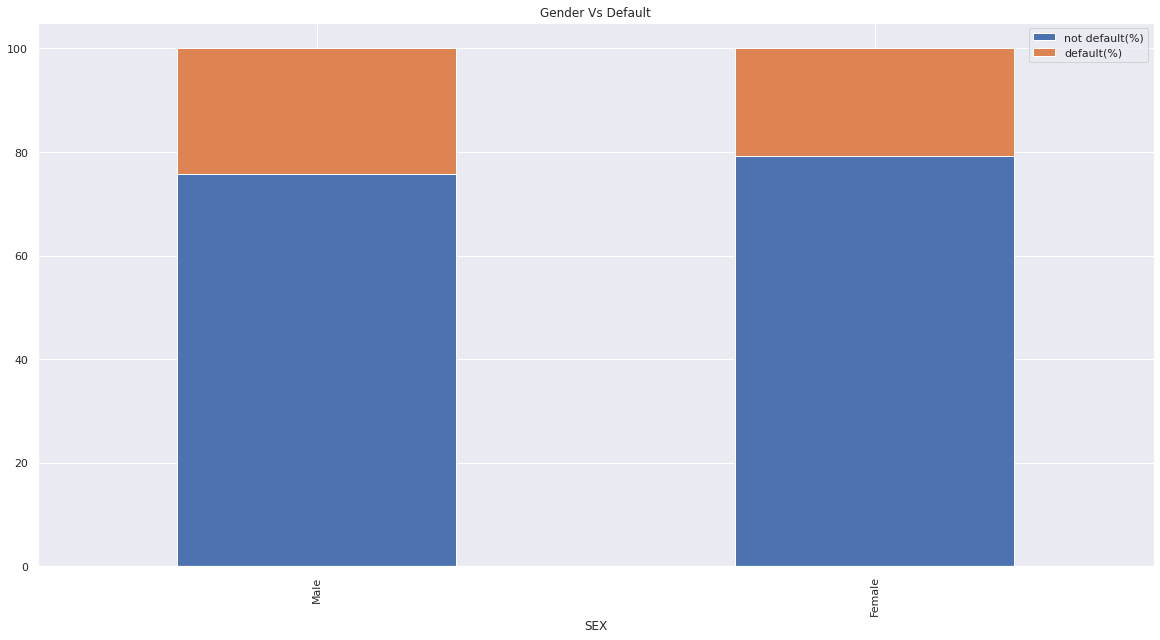

In [32]:
gender_plot_ = gender.iloc[:,[0,4,5]].plot(kind='bar',stacked=True,x='SEX', title = 'Gender Vs Default')
gender_plot_.set_xticklabels(['Male','Female'])

#### Education with default


In [33]:
#replace outliner  to others 
df['EDUCATION'] = df['EDUCATION'].replace([0,5,6],4)

In [34]:
education_no_default = df.groupby(df['EDUCATION'][df['Default']==0]).size().reset_index(name='no default')
education_default = df.groupby(df['EDUCATION'][df['Default']==1]).size().reset_index(name='default')
education_total = df.groupby(df['EDUCATION']).size().reset_index(name='total')
education_total
education_default

,EDUCATION,default
0,1.0,2036
1,2.0,3330
2,3.0,1237
3,4.0,33


In [35]:
education = education_no_default.join(education_default.set_index('EDUCATION'),on='EDUCATION').join(education_total.set_index('EDUCATION'),on= 'EDUCATION')
education

,EDUCATION,no default,default,total
0,1.0,8549,2036,10585
1,2.0,10700,3330,14030
2,3.0,3680,1237,4917
3,4.0,435,33,468


[Text(0, 0, 'graduate'),
 Text(0, 0, 'university'),
 Text(0, 0, 'high school'),
 Text(0, 0, 'others')]

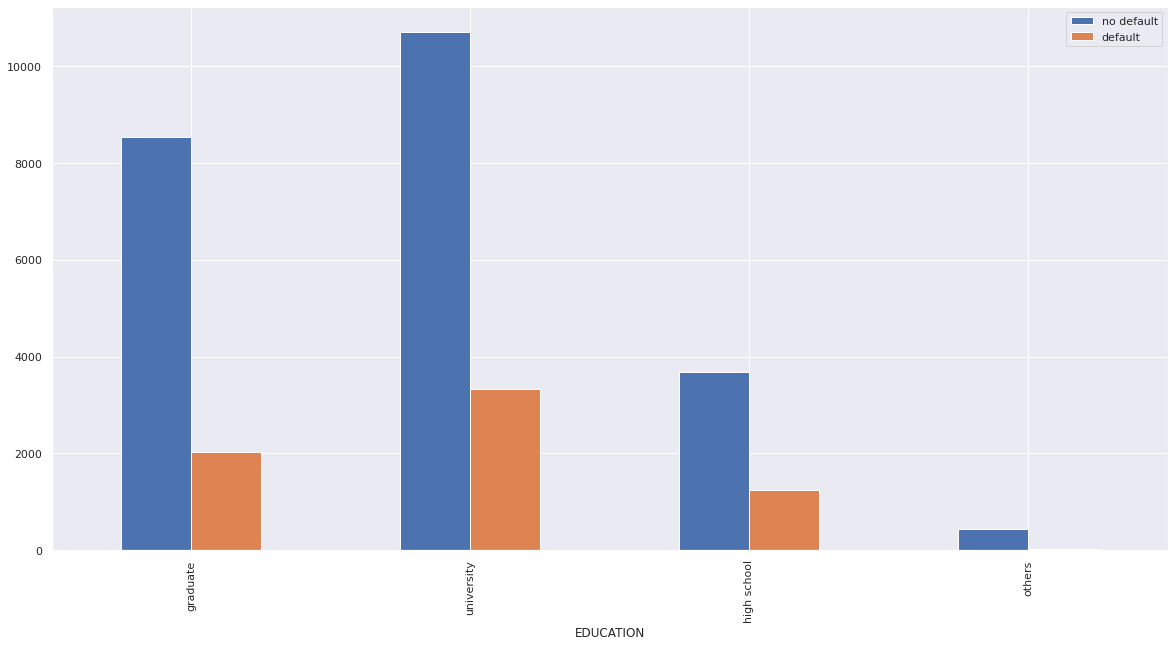

In [36]:
education_plot = education.iloc[:,0:3].plot(kind='bar',x='EDUCATION')
education_plot.set_xticklabels(['graduate','university','high school','others'])

In [37]:
education['no default(%)'] = round(education['no default']/education['total']*100,2)
education['default(%)'] = round(education['default']/education['total']*100,2)

In [38]:
education

,EDUCATION,no default,default,total,no default(%),default(%)
0,1.0,8549,2036,10585,80.77,19.23
1,2.0,10700,3330,14030,76.27,23.73
2,3.0,3680,1237,4917,74.84,25.16
3,4.0,435,33,468,92.95,7.05


[Text(0, 0, 'graduate'),
 Text(0, 0, 'university'),
 Text(0, 0, 'high school'),
 Text(0, 0, 'others')]

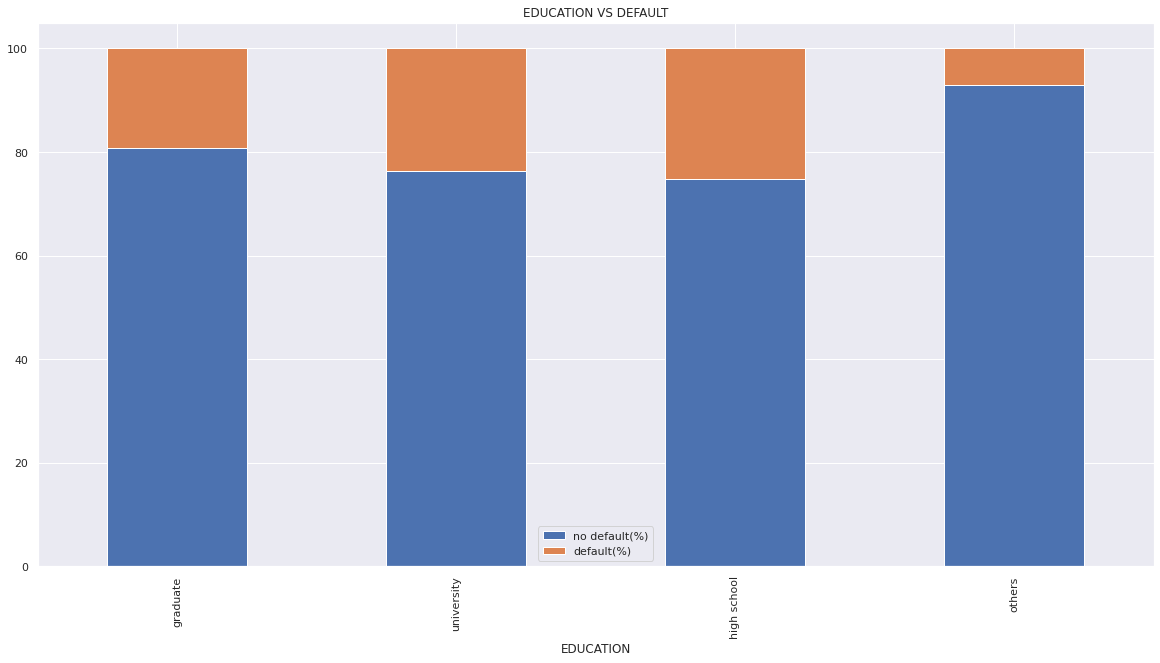

In [39]:
education_plot_pct = education.iloc[:,[0,4,5]].plot(kind='bar',stacked = True, x='EDUCATION',title = 'EDUCATION VS DEFAULT')
education_plot_pct.set_xticklabels(['graduate','university','high school','others'])

[Text(0, 0, 'graduate'),
 Text(0, 0, 'university'),
 Text(0, 0, 'high school'),
 Text(0, 0, 'others')]

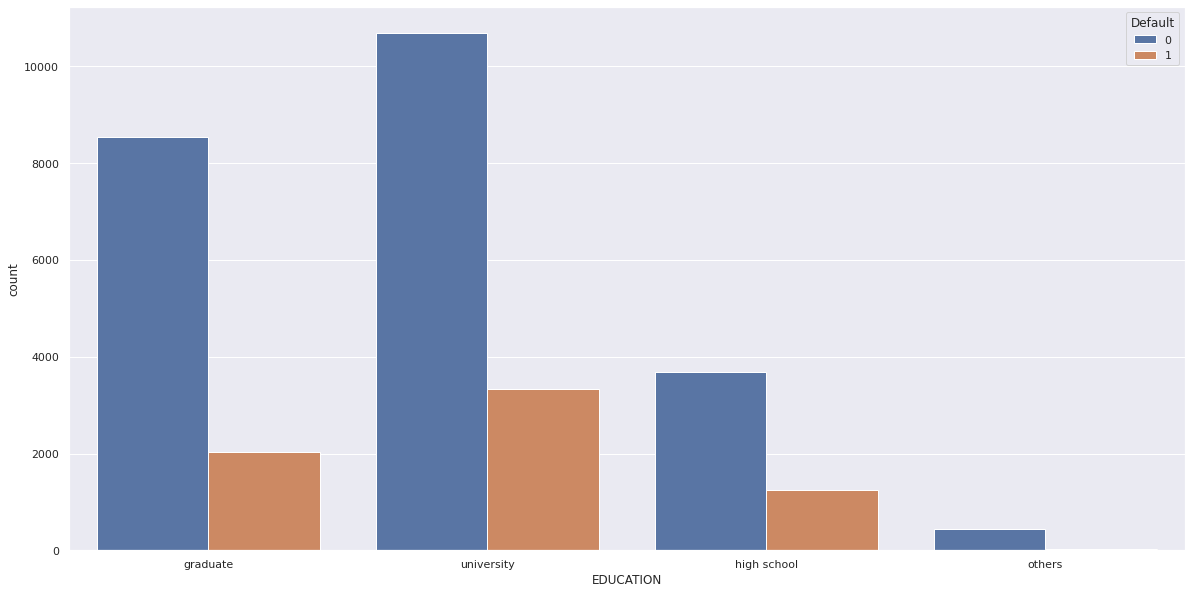

In [40]:
edu=sns.countplot(x='EDUCATION',hue='Default',data=df)
edu.set_xticklabels(['graduate','university','high school','others'])

##### university is most card holder

#### age with default

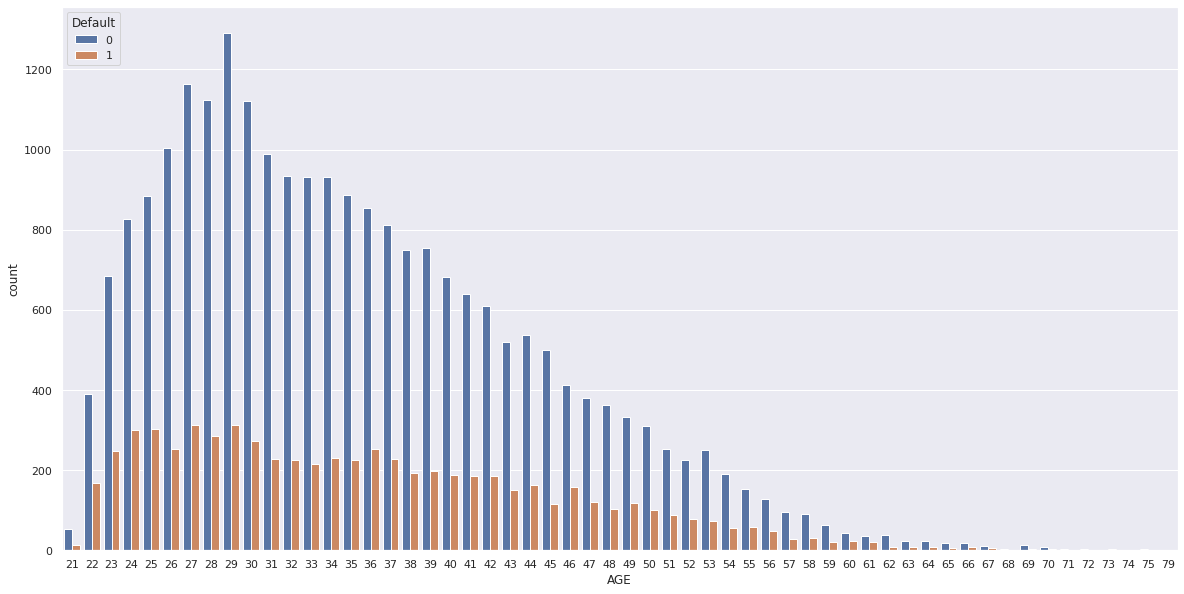

In [41]:
sns.set(rc={'figure.figsize':(20,10)})
sns.countplot(x='AGE',hue='Default',data=df)

In [42]:
age_no_default = df.groupby(df['AGE'][df['Default']==0]).size().reset_index(name='no default')
age_default = df.groupby(df['AGE'][df['Default']==1]).size().reset_index(name='default')
age_total = df.groupby(df['AGE']).size().reset_index(name='total')


In [43]:
age = age_no_default.join(age_default.set_index('AGE'),on='AGE').join(age_total.set_index('AGE'),on= 'AGE')

In [44]:
age['no default(%)'] = round(age['no default']/age['total']*100,2)
age['default(%)'] = round(age['default']/age['total']*100,2)
age

,AGE,no default,default,total,no default(%),default(%)
0,21.0,53,14.0,67,79.10,20.90
1,22.0,391,169.0,560,69.82,30.18
2,23.0,684,247.0,931,73.47,26.53
3,24.0,827,300.0,1127,73.38,26.62
4,25.0,884,302.0,1186,74.54,25.46
5,26.0,1003,253.0,1256,79.86,20.14
6,27.0,1164,313.0,1477,78.81,21.19
7,28.0,1123,286.0,1409,79.70,20.30
8,29.0,1292,313.0,1605,80.50,19.50
9,30.0,1121,274.0,1395,80.36,19.64


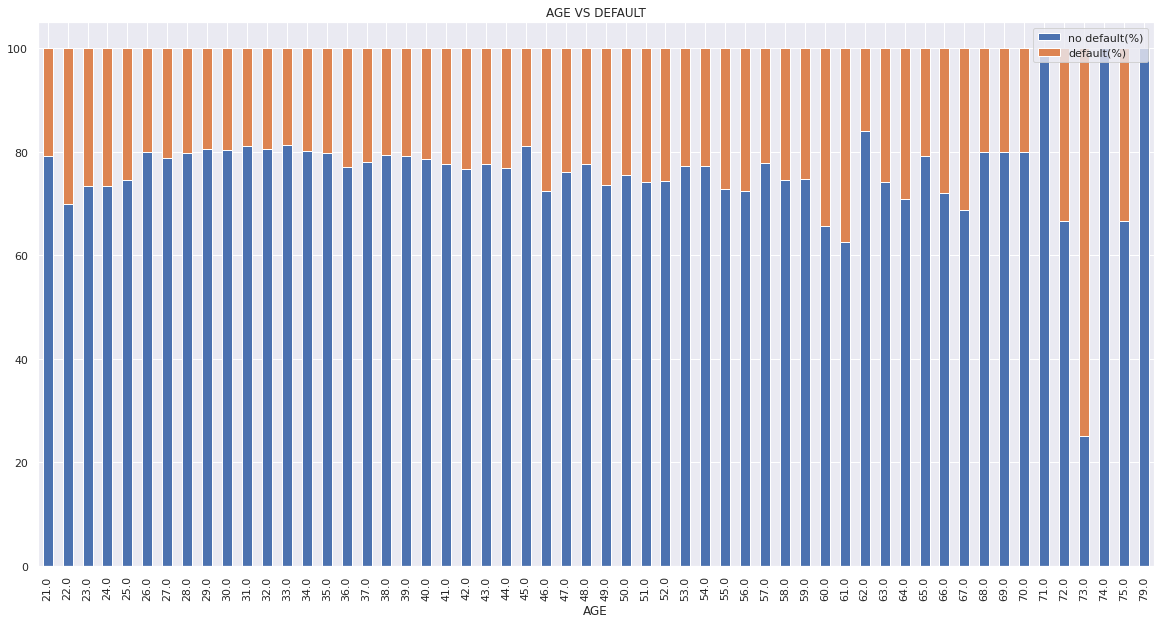

In [45]:
age_plot_pct = age.iloc[:,[0,4,5]].plot(kind='bar',stacked = True, x='AGE',title = 'AGE VS DEFAULT')
 

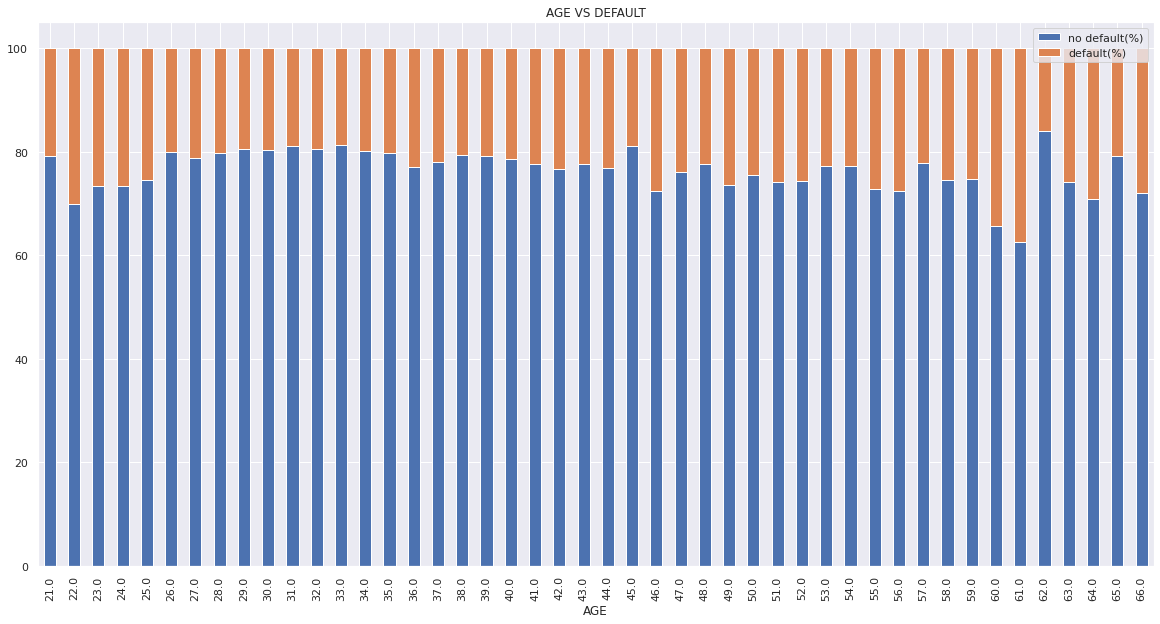

In [46]:
age_plot_pct = age.iloc[:,[0,4,5]].query('AGE<67').plot(kind='bar',stacked = True, x='AGE',title = 'AGE VS DEFAULT')
 

#### Handle PAY_X = -2 outliner


In [47]:
df.query('PAY_0==-2 | PAY_2==-2 | PAY_3==-2 | PAY_4==-2 | PAY_5==-2 | PAY_6==-2')

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,Default
0,1,20000,2,2,1,24,2,2,-1,-1,-2,-2,3913,3102,689,0,0,0,0,689,0,0,0,0,1
9,10,20000,1,3,2,35,-2,-2,-2,-2,-1,-1,0,0,0,0,13007,13912,0,0,0,13007,1122,0,0
18,19,360000,2,1,1,49,1,-2,-2,-2,-2,-2,0,0,0,0,0,0,0,0,0,0,0,0,0
19,20,180000,2,1,2,29,1,-2,-2,-2,-2,-2,0,0,0,0,0,0,0,0,0,0,0,0,0
23,24,450000,2,1,1,40,-2,-2,-2,-2,-2,-2,5512,19420,1473,560,0,0,19428,1473,560,0,0,1128,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29984,29985,30000,1,2,2,38,-1,-1,-2,-1,-1,-1,315,923,2939,1993,1907,3319,923,2977,1999,3057,3319,1000,0
29985,29986,240000,1,1,2,30,-2,-2,-2,-2,-2,-2,0,0,0,0,0,0,0,0,0,0,0,0,0
29986,29987,360000,1,1,2,35,-1,-1,-2,-2,-2,-2,2220,0,0,0,0,0,0,0,0,0,0,0,0
29989,29990,150000,1,1,2,35,-1,-1,-1,-1,-1,-2,3425,9009,-3,780,0,0,9054,0,783,0,0,0,0


In [48]:
df = df.drop(df.query('PAY_0==-2 | PAY_2==-2 | PAY_3==-2 | PAY_4==-2 | PAY_5==-2 | PAY_6==-2').index)

In [49]:
df

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,Default
1,2,120000,2,2,2,26,-1,2,0,0,0,2,2682,1725,2682,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,0,0,29239,14027,13559,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,0,0,46990,48233,49291,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,-1,0,-1,0,0,0,8617,5670,35835,20940,19146,19131,2000,36681,10000,9000,689,679,0
5,6,50000,1,1,2,37,0,0,0,0,0,0,64400,57069,57608,19394,19619,20024,2500,1815,657,1000,1000,800,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,29996,220000,1,3,1,39,0,0,0,0,0,0,188948,192815,208365,88004,31237,15980,8500,20000,5003,3047,5000,1000,0
29996,29997,150000,1,3,2,43,-1,-1,-1,-1,0,0,1683,1828,3502,8979,5190,0,1837,3526,8998,129,0,0,0
29997,29998,30000,1,2,2,37,4,3,2,-1,0,0,3565,3356,2758,20878,20582,19357,0,0,22000,4200,2000,3100,1
29998,29999,80000,1,3,1,41,1,-1,0,0,0,-1,-1645,78379,76304,52774,11855,48944,85900,3409,1178,1926,52964,1804,1


In [50]:
cat_col =['SEX','EDUCATION','MARRIAGE','PAY_0','PAY_2','PAY_3','PAY_4','PAY_5','PAY_6']
categ_data = df[cat_col]
categ_data

,SEX,EDUCATION,MARRIAGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6
1,2,2,2,-1,2,0,0,0,2
2,2,2,2,0,0,0,0,0,0
3,2,2,1,0,0,0,0,0,0
4,1,2,1,-1,0,-1,0,0,0
5,1,1,2,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...
29995,1,3,1,0,0,0,0,0,0
29996,1,3,2,-1,-1,-1,-1,0,0
29997,1,2,2,4,3,2,-1,0,0
29998,1,3,1,1,-1,0,0,0,-1


In [51]:
num_col = ['LIMIT_BAL','AGE','BILL_AMT1','BILL_AMT2','BILL_AMT3','BILL_AMT4','BILL_AMT5','BILL_AMT6','PAY_AMT1','PAY_AMT2','PAY_AMT3','PAY_AMT4','PAY_AMT5','PAY_AMT6']
num_data = df[num_col]
num_data
 

,LIMIT_BAL,AGE,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6
1,120000,26,2682,1725,2682,3272,3455,3261,0,1000,1000,1000,0,2000
2,90000,34,29239,14027,13559,14331,14948,15549,1518,1500,1000,1000,1000,5000
3,50000,37,46990,48233,49291,28314,28959,29547,2000,2019,1200,1100,1069,1000
4,50000,57,8617,5670,35835,20940,19146,19131,2000,36681,10000,9000,689,679
5,50000,37,64400,57069,57608,19394,19619,20024,2500,1815,657,1000,1000,800
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,220000,39,188948,192815,208365,88004,31237,15980,8500,20000,5003,3047,5000,1000
29996,150000,43,1683,1828,3502,8979,5190,0,1837,3526,8998,129,0,0
29997,30000,37,3565,3356,2758,20878,20582,19357,0,0,22000,4200,2000,3100
29998,80000,41,-1645,78379,76304,52774,11855,48944,85900,3409,1178,1926,52964,1804


In [52]:
df.columns.tolist()

['ID',
 'LIMIT_BAL',
 'SEX',
 'EDUCATION',
 'MARRIAGE',
 'AGE',
 'PAY_0',
 'PAY_2',
 'PAY_3',
 'PAY_4',
 'PAY_5',
 'PAY_6',
 'BILL_AMT1',
 'BILL_AMT2',
 'BILL_AMT3',
 'BILL_AMT4',
 'BILL_AMT5',
 'BILL_AMT6',
 'PAY_AMT1',
 'PAY_AMT2',
 'PAY_AMT3',
 'PAY_AMT4',
 'PAY_AMT5',
 'PAY_AMT6',
 'Default']

In [53]:
target_col = df.columns.tolist()[-1]
target_col

'Default'

In [54]:
df['Default'].value_counts()    # get the unique count of y

0    18054
1     5385
Name: Default, dtype: int64

#### heatmap 

In [ ]:
 df['Default']

1        1
2        0
3        0
4        0
5        0
        ..
29995    0
29996    0
29997    1
29998    1
29999    1
Name: Default, Length: 23439, dtype: int64

In [ ]:
dfff = pd.concat([df[num_col],df[cat_col], df['Default']], axis=1)
dfff

,LIMIT_BAL,AGE,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,SEX,EDUCATION,MARRIAGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,Default
1,-0.285353,-0.997022,-0.756849,-0.772020,-0.756577,-0.735975,-0.721212,-0.708230,-0.360377,-0.253651,-0.252860,-0.263968,-0.337272,-0.193754,2,2,2,-1,2,0,0,0,2,1
2,-0.520734,-0.136781,-0.415877,-0.609000,-0.606832,-0.573899,-0.542941,-0.513724,-0.270403,-0.229025,-0.252860,-0.263968,-0.270736,-0.021972,2,2,2,0,0,0,0,0,0,0
3,-0.834574,0.185809,-0.187968,-0.155717,-0.114906,-0.368969,-0.325612,-0.292151,-0.241834,-0.203464,-0.241855,-0.257519,-0.266145,-0.251014,2,2,1,0,0,0,0,0,0,0
4,-0.834574,2.336411,-0.680648,-0.719743,-0.300156,-0.477040,-0.477824,-0.457025,-0.241834,1.503712,0.242353,0.251919,-0.291429,-0.269395,1,2,1,-1,0,-1,0,0,0,0
5,-0.834574,0.185809,0.035563,-0.038627,-0.000405,-0.499697,-0.470488,-0.442890,-0.212199,-0.213511,-0.271733,-0.263968,-0.270736,-0.262467,1,1,2,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,0.499247,0.400870,1.634663,1.760217,2.075082,0.505824,-0.290278,-0.506902,0.143430,0.682138,-0.032600,-0.131965,-0.004592,-0.251014,1,3,1,0,0,0,0,0,0,0
29996,-0.049973,0.830990,-0.769675,-0.770655,-0.745288,-0.652335,-0.694300,-0.759848,-0.251495,-0.129241,0.187219,-0.320135,-0.337272,-0.308275,1,3,2,-1,-1,-1,-1,0,0,0
29997,-0.991494,0.185809,-0.745512,-0.750407,-0.755530,-0.477948,-0.455550,-0.453448,-0.360377,-0.302904,0.902637,-0.057613,-0.204200,-0.130767,1,2,2,4,3,2,-1,0,0,1
29998,-0.599194,0.615930,-0.812404,0.243764,0.256985,-0.010493,-0.590917,0.014882,4.731036,-0.135003,-0.243066,-0.204254,3.186745,-0.204977,1,3,1,1,-1,0,0,0,-1,1


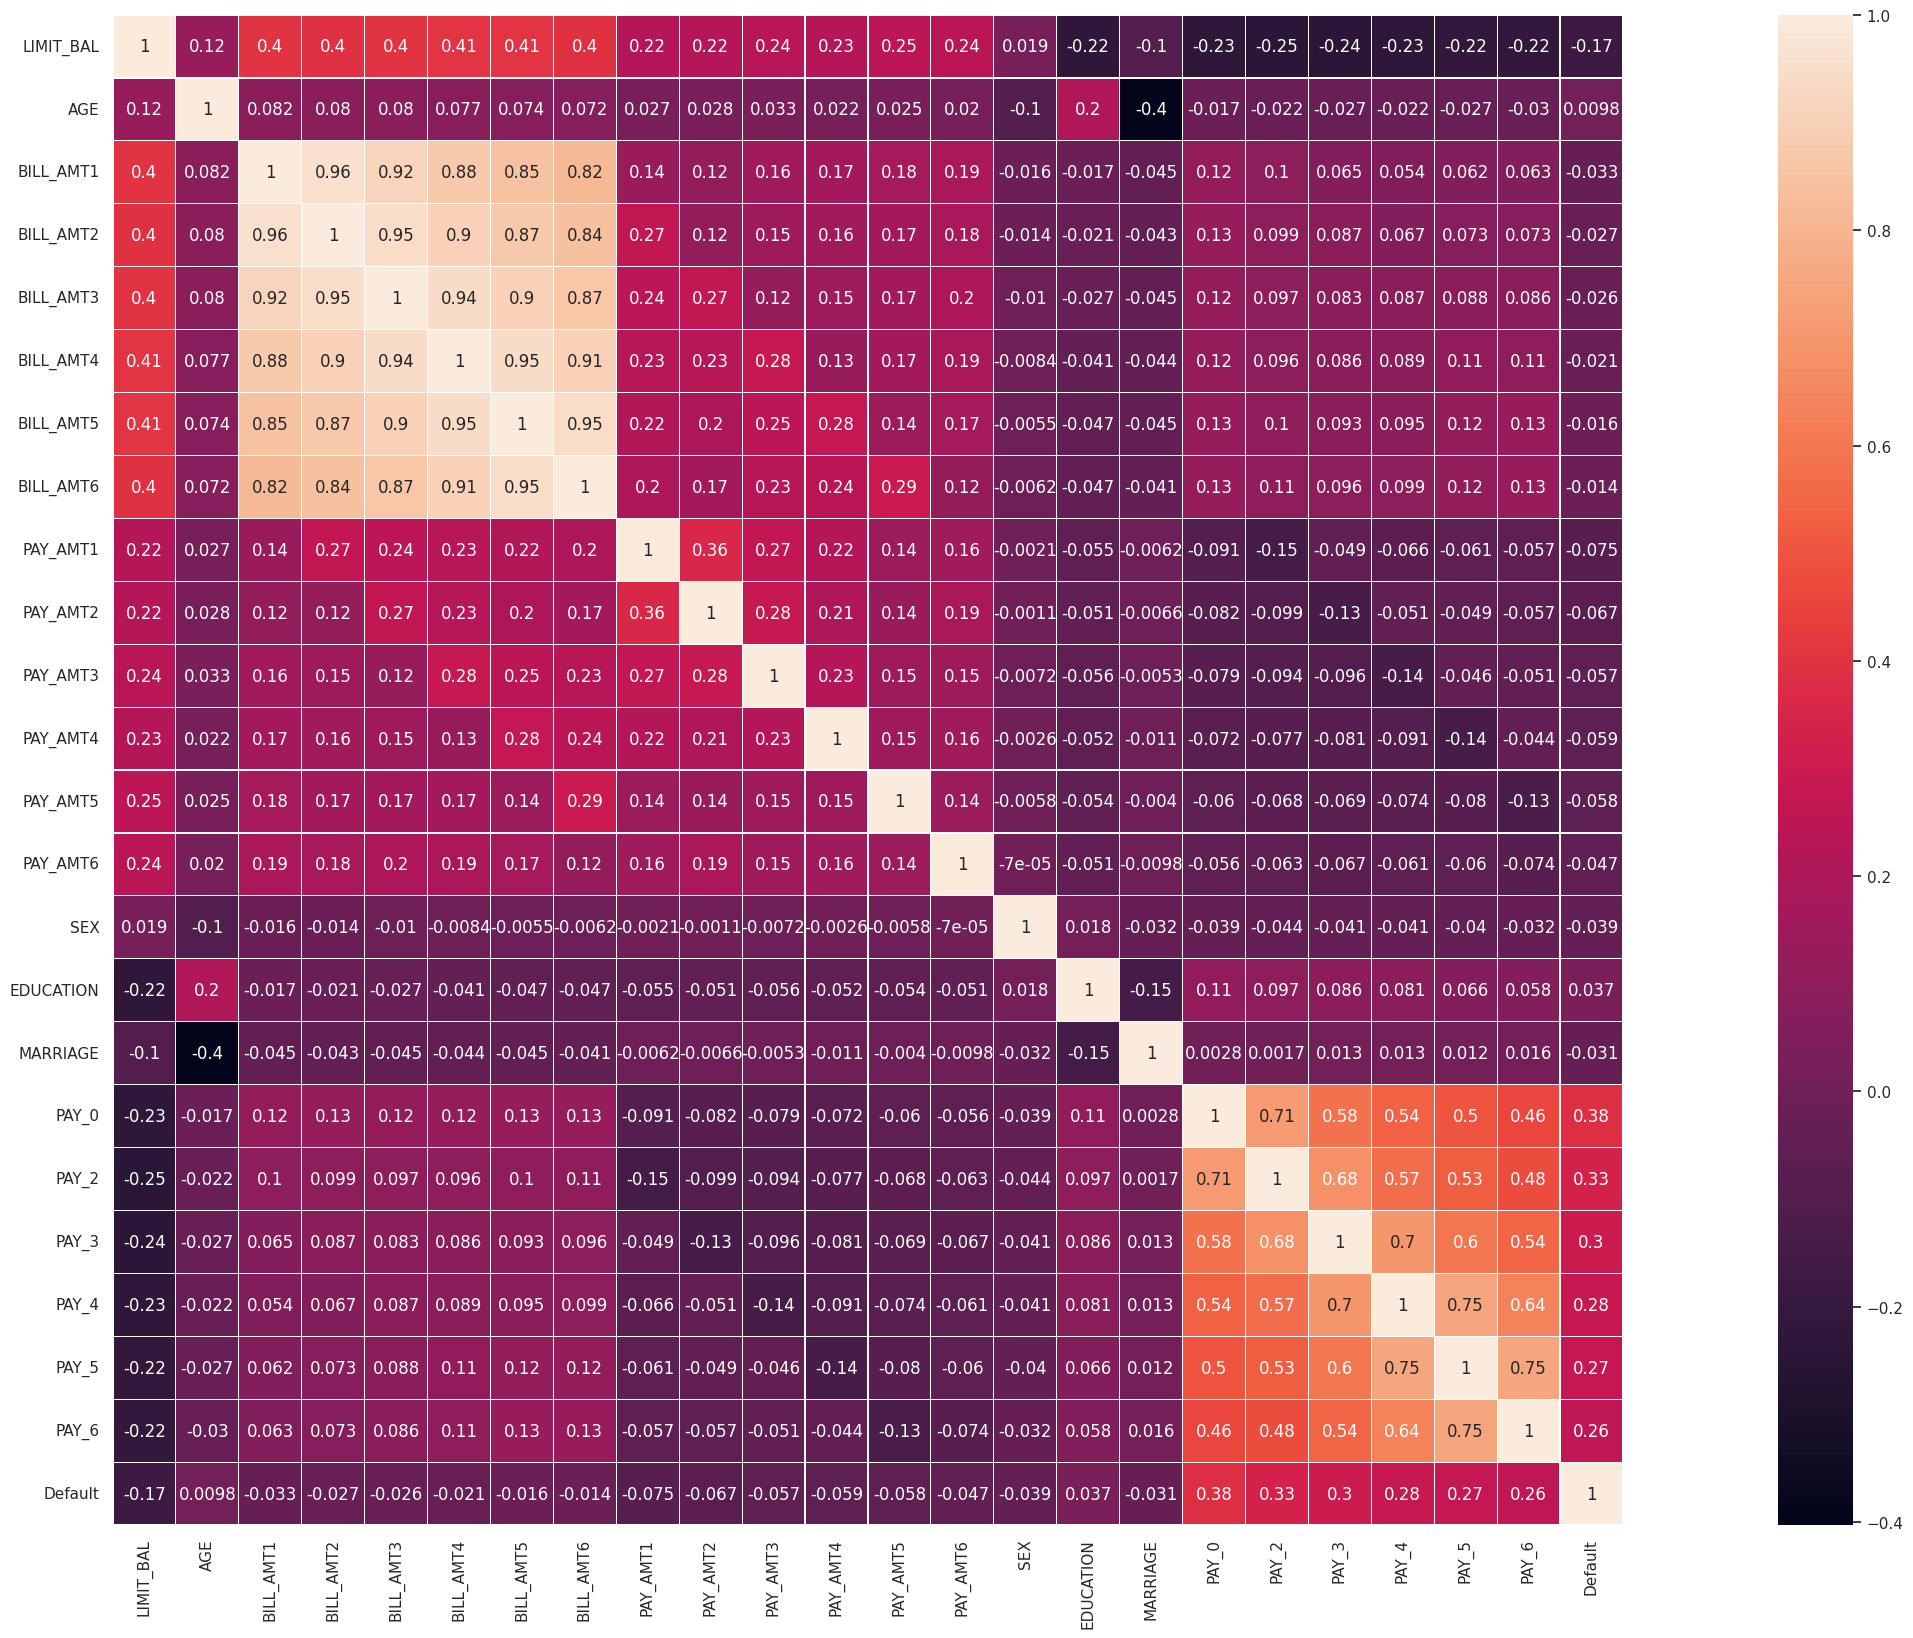

In [ ]:
fig = plt.figure(figsize=(40, 20), dpi = 100) 
coor = (dfff).corr()
sns.heatmap(coor,square= True, linewidths = 0.1, annot = True )
plt.show()

In [ ]:
coor

,LIMIT_BAL,AGE,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,SEX,EDUCATION,MARRIAGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,Default
LIMIT_BAL,1.000000,0.123876,0.402493,0.396292,0.400706,0.407179,0.405467,0.395592,0.222991,0.224045,0.236686,0.226598,0.245887,0.240739,0.019066,-0.224630,-0.099582,-0.231087,-0.246948,-0.243530,-0.231022,-0.215618,-0.215004,-0.172970
AGE,0.123876,1.000000,0.082185,0.080040,0.080231,0.077019,0.073788,0.071764,0.027201,0.028190,0.033014,0.022253,0.025479,0.020143,-0.104201,0.203001,-0.402935,-0.017001,-0.021569,-0.027087,-0.021805,-0.027071,-0.029653,0.009817
BILL_AMT1,0.402493,0.082185,1.000000,0.959915,0.915821,0.875579,0.846670,0.818798,0.135505,0.115936,0.156081,0.169598,0.176516,0.191510,-0.015637,-0.016632,-0.044688,0.123133,0.100745,0.065166,0.054002,0.062096,0.062851,-0.032742
BILL_AMT2,0.396292,0.080040,0.959915,1.000000,0.945417,0.902864,0.872019,0.843782,0.266366,0.117092,0.154463,0.160640,0.171733,0.182365,-0.014333,-0.020981,-0.042821,0.125928,0.098974,0.086872,0.067252,0.072711,0.073418,-0.026802
BILL_AMT3,0.400706,0.080231,0.915821,0.945417,1.000000,0.940105,0.901671,0.866111,0.244012,0.266688,0.124681,0.150563,0.170757,0.197307,-0.009985,-0.026684,-0.045139,0.122993,0.096659,0.083079,0.087378,0.088264,0.085675,-0.025755
BILL_AMT4,0.407179,0.077019,0.875579,0.902864,0.940105,1.000000,0.945121,0.906214,0.232107,0.227505,0.282824,0.133939,0.165046,0.189040,-0.008447,-0.040822,-0.044049,0.122370,0.096427,0.086370,0.089323,0.111799,0.105253,-0.021107
BILL_AMT5,0.405467,0.073788,0.846670,0.872019,0.901671,0.945121,1.000000,0.949258,0.215184,0.196983,0.247441,0.275774,0.143590,0.174892,-0.005535,-0.047070,-0.044733,0.128011,0.103576,0.093120,0.095154,0.115878,0.130601,-0.016287
BILL_AMT6,0.395592,0.071764,0.818798,0.843782,0.866111,0.906214,0.949258,1.000000,0.197278,0.172296,0.229746,0.242857,0.293929,0.120536,-0.006185,-0.047133,-0.041001,0.127311,0.106076,0.096247,0.098715,0.116761,0.130576,-0.014248
PAY_AMT1,0.222991,0.027201,0.135505,0.266366,0.244012,0.232107,0.215184,0.197278,1.000000,0.357464,0.268730,0.216775,0.142117,0.159447,-0.002101,-0.054969,-0.006194,-0.091256,-0.147930,-0.048540,-0.065835,-0.061053,-0.057345,-0.074960
PAY_AMT2,0.224045,0.028190,0.115936,0.117092,0.266688,0.227505,0.196983,0.172296,0.357464,1.000000,0.282974,0.210309,0.135158,0.185588,-0.001057,-0.051260,-0.006554,-0.082399,-0.098505,-0.134484,-0.050601,-0.048839,-0.056554,-0.067406


## Data Preparation 

###  Numerical data 

In [56]:
from sklearn.model_selection import train_test_split    # for spliting the datast into train and test
from sklearn.preprocessing import OneHotEncoder         # for categorical encoding
from sklearn.preprocessing import MinMaxScaler 
from sklearn.preprocessing import StandardScaler  

In [57]:
df.columns.tolist()

['ID',
 'LIMIT_BAL',
 'SEX',
 'EDUCATION',
 'MARRIAGE',
 'AGE',
 'PAY_0',
 'PAY_2',
 'PAY_3',
 'PAY_4',
 'PAY_5',
 'PAY_6',
 'BILL_AMT1',
 'BILL_AMT2',
 'BILL_AMT3',
 'BILL_AMT4',
 'BILL_AMT5',
 'BILL_AMT6',
 'PAY_AMT1',
 'PAY_AMT2',
 'PAY_AMT3',
 'PAY_AMT4',
 'PAY_AMT5',
 'PAY_AMT6',
 'Default']

In [59]:
scaler = MinMaxScaler()
scaler.fit(df[num_col])
df[num_col] = scaler.transform(df[num_col])

In [60]:
scaler = StandardScaler()
scaler.fit(df[num_col])
df[num_col] = scaler.transform(df[num_col])

In [61]:
df[num_col]

,LIMIT_BAL,AGE,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6
1,-0.285353,-0.997022,-0.756849,-0.772020,-0.756577,-0.735975,-0.721212,-0.708230,-0.360377,-0.253651,-0.252860,-0.263968,-0.337272,-0.193754
2,-0.520734,-0.136781,-0.415877,-0.609000,-0.606832,-0.573899,-0.542941,-0.513724,-0.270403,-0.229025,-0.252860,-0.263968,-0.270736,-0.021972
3,-0.834574,0.185809,-0.187968,-0.155717,-0.114906,-0.368969,-0.325612,-0.292151,-0.241834,-0.203464,-0.241855,-0.257519,-0.266145,-0.251014
4,-0.834574,2.336411,-0.680648,-0.719743,-0.300156,-0.477040,-0.477824,-0.457025,-0.241834,1.503712,0.242353,0.251919,-0.291429,-0.269395
5,-0.834574,0.185809,0.035563,-0.038627,-0.000405,-0.499697,-0.470488,-0.442890,-0.212199,-0.213511,-0.271733,-0.263968,-0.270736,-0.262467
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,0.499247,0.400870,1.634663,1.760217,2.075082,0.505824,-0.290278,-0.506902,0.143430,0.682138,-0.032600,-0.131965,-0.004592,-0.251014
29996,-0.049973,0.830990,-0.769675,-0.770655,-0.745288,-0.652335,-0.694300,-0.759848,-0.251495,-0.129241,0.187219,-0.320135,-0.337272,-0.308275
29997,-0.991494,0.185809,-0.745512,-0.750407,-0.755530,-0.477948,-0.455550,-0.453448,-0.360377,-0.302904,0.902637,-0.057613,-0.204200,-0.130767
29998,-0.599194,0.615930,-0.812404,0.243764,0.256985,-0.010493,-0.590917,0.014882,4.731036,-0.135003,-0.243066,-0.204254,3.186745,-0.204977


### categorical data

In [169]:
df[cat_col]

,SEX,EDUCATION,MARRIAGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6
1,2,2,2,-1,2,0,0,0,2
2,2,2,2,0,0,0,0,0,0
3,2,2,1,0,0,0,0,0,0
4,1,2,1,-1,0,-1,0,0,0
5,1,1,2,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...
29995,1,3,1,0,0,0,0,0,0
29996,1,3,2,-1,-1,-1,-1,0,0
29997,1,2,2,4,3,2,-1,0,0
29998,1,3,1,1,-1,0,0,0,-1


In [62]:
encoder = OneHotEncoder(handle_unknown = 'ignore', sparse = False)
encoder.fit(df[cat_col])          # fit the model on categorical column
encoded_cols = list(encoder.get_feature_names(cat_col))    # name of give columns
print(encoded_cols)
df[encoded_cols] = encoder.transform(df[cat_col]) 

['SEX_1', 'SEX_2', 'EDUCATION_1', 'EDUCATION_2', 'EDUCATION_3', 'EDUCATION_4', 'MARRIAGE_1', 'MARRIAGE_2', 'MARRIAGE_3', 'PAY_0_-1', 'PAY_0_0', 'PAY_0_1', 'PAY_0_2', 'PAY_0_3', 'PAY_0_4', 'PAY_0_5', 'PAY_0_6', 'PAY_0_7', 'PAY_0_8', 'PAY_2_-1', 'PAY_2_0', 'PAY_2_1', 'PAY_2_2', 'PAY_2_3', 'PAY_2_4', 'PAY_2_5', 'PAY_2_6', 'PAY_2_7', 'PAY_2_8', 'PAY_3_-1', 'PAY_3_0', 'PAY_3_1', 'PAY_3_2', 'PAY_3_3', 'PAY_3_4', 'PAY_3_5', 'PAY_3_6', 'PAY_3_7', 'PAY_3_8', 'PAY_4_-1', 'PAY_4_0', 'PAY_4_1', 'PAY_4_2', 'PAY_4_3', 'PAY_4_4', 'PAY_4_5', 'PAY_4_6', 'PAY_4_7', 'PAY_4_8', 'PAY_5_-1', 'PAY_5_0', 'PAY_5_2', 'PAY_5_3', 'PAY_5_4', 'PAY_5_5', 'PAY_5_6', 'PAY_5_7', 'PAY_5_8', 'PAY_6_-1', 'PAY_6_0', 'PAY_6_2', 'PAY_6_3', 'PAY_6_4', 'PAY_6_5', 'PAY_6_6', 'PAY_6_7', 'PAY_6_8']


In [63]:
df[encoded_cols]

,SEX_1,SEX_2,EDUCATION_1,EDUCATION_2,EDUCATION_3,EDUCATION_4,MARRIAGE_1,MARRIAGE_2,MARRIAGE_3,PAY_0_-1,PAY_0_0,PAY_0_1,PAY_0_2,PAY_0_3,PAY_0_4,PAY_0_5,PAY_0_6,PAY_0_7,PAY_0_8,PAY_2_-1,PAY_2_0,PAY_2_1,PAY_2_2,PAY_2_3,PAY_2_4,PAY_2_5,PAY_2_6,PAY_2_7,PAY_2_8,PAY_3_-1,PAY_3_0,PAY_3_1,PAY_3_2,PAY_3_3,PAY_3_4,PAY_3_5,PAY_3_6,PAY_3_7,PAY_3_8,PAY_4_-1,PAY_4_0,PAY_4_1,PAY_4_2,PAY_4_3,PAY_4_4,PAY_4_5,PAY_4_6,PAY_4_7,PAY_4_8,PAY_5_-1,PAY_5_0,PAY_5_2,PAY_5_3,PAY_5_4,PAY_5_5,PAY_5_6,PAY_5_7,PAY_5_8,PAY_6_-1,PAY_6_0,PAY_6_2,PAY_6_3,PAY_6_4,PAY_6_5,PAY_6_6,PAY_6_7,PAY_6_8
1,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
29996,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
29997,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
29998,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [64]:
X = df[num_col + encoded_cols]

In [171]:
X_tree=df[num_col + cat_col]

In [65]:
X

,LIMIT_BAL,AGE,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,SEX_1,SEX_2,EDUCATION_1,EDUCATION_2,EDUCATION_3,EDUCATION_4,MARRIAGE_1,MARRIAGE_2,MARRIAGE_3,PAY_0_-1,PAY_0_0,PAY_0_1,PAY_0_2,PAY_0_3,PAY_0_4,PAY_0_5,PAY_0_6,PAY_0_7,PAY_0_8,PAY_2_-1,PAY_2_0,PAY_2_1,PAY_2_2,PAY_2_3,PAY_2_4,PAY_2_5,PAY_2_6,PAY_2_7,PAY_2_8,PAY_3_-1,PAY_3_0,PAY_3_1,PAY_3_2,PAY_3_3,PAY_3_4,PAY_3_5,PAY_3_6,PAY_3_7,PAY_3_8,PAY_4_-1,PAY_4_0,PAY_4_1,PAY_4_2,PAY_4_3,PAY_4_4,PAY_4_5,PAY_4_6,PAY_4_7,PAY_4_8,PAY_5_-1,PAY_5_0,PAY_5_2,PAY_5_3,PAY_5_4,PAY_5_5,PAY_5_6,PAY_5_7,PAY_5_8,PAY_6_-1,PAY_6_0,PAY_6_2,PAY_6_3,PAY_6_4,PAY_6_5,PAY_6_6,PAY_6_7,PAY_6_8
1,-0.285353,-0.997022,-0.756849,-0.772020,-0.756577,-0.735975,-0.721212,-0.708230,-0.360377,-0.253651,-0.252860,-0.263968,-0.337272,-0.193754,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
2,-0.520734,-0.136781,-0.415877,-0.609000,-0.606832,-0.573899,-0.542941,-0.513724,-0.270403,-0.229025,-0.252860,-0.263968,-0.270736,-0.021972,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,-0.834574,0.185809,-0.187968,-0.155717,-0.114906,-0.368969,-0.325612,-0.292151,-0.241834,-0.203464,-0.241855,-0.257519,-0.266145,-0.251014,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,-0.834574,2.336411,-0.680648,-0.719743,-0.300156,-0.477040,-0.477824,-0.457025,-0.241834,1.503712,0.242353,0.251919,-0.291429,-0.269395,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,-0.834574,0.185809,0.035563,-0.038627,-0.000405,-0.499697,-0.470488,-0.442890,-0.212199,-0.213511,-0.271733,-0.263968,-0.270736,-0.262467,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,0.499247,0.400870,1.634663,1.760217,2.075082,0.505824,-0.290278,-0.506902,0.143430,0.682138,-0.032600,-0.131965,-0.004592,-0.251014,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
29996,-0.049973,0.830990,-0.769675,-0.770655,-0.745288,-0.652335,-0.694300,-0.759848,-0.251495,-0.129241,0.187219,-0.320135,-0.337272,-0.308275,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
29997,-0.991494,0.185809,-0.745512,-0.750407,-0.755530,-0.477948,-0.455550,-0.453448,-0.360377,-0.302904,0.902637,-0.05

In [66]:
y = df[target_col]
y


1        1
2        0
3        0
4        0
5        0
        ..
29995    0
29996    0
29997    1
29998    1
29999    1
Name: Default, Length: 23439, dtype: int64

In [67]:
len(num_col)

14

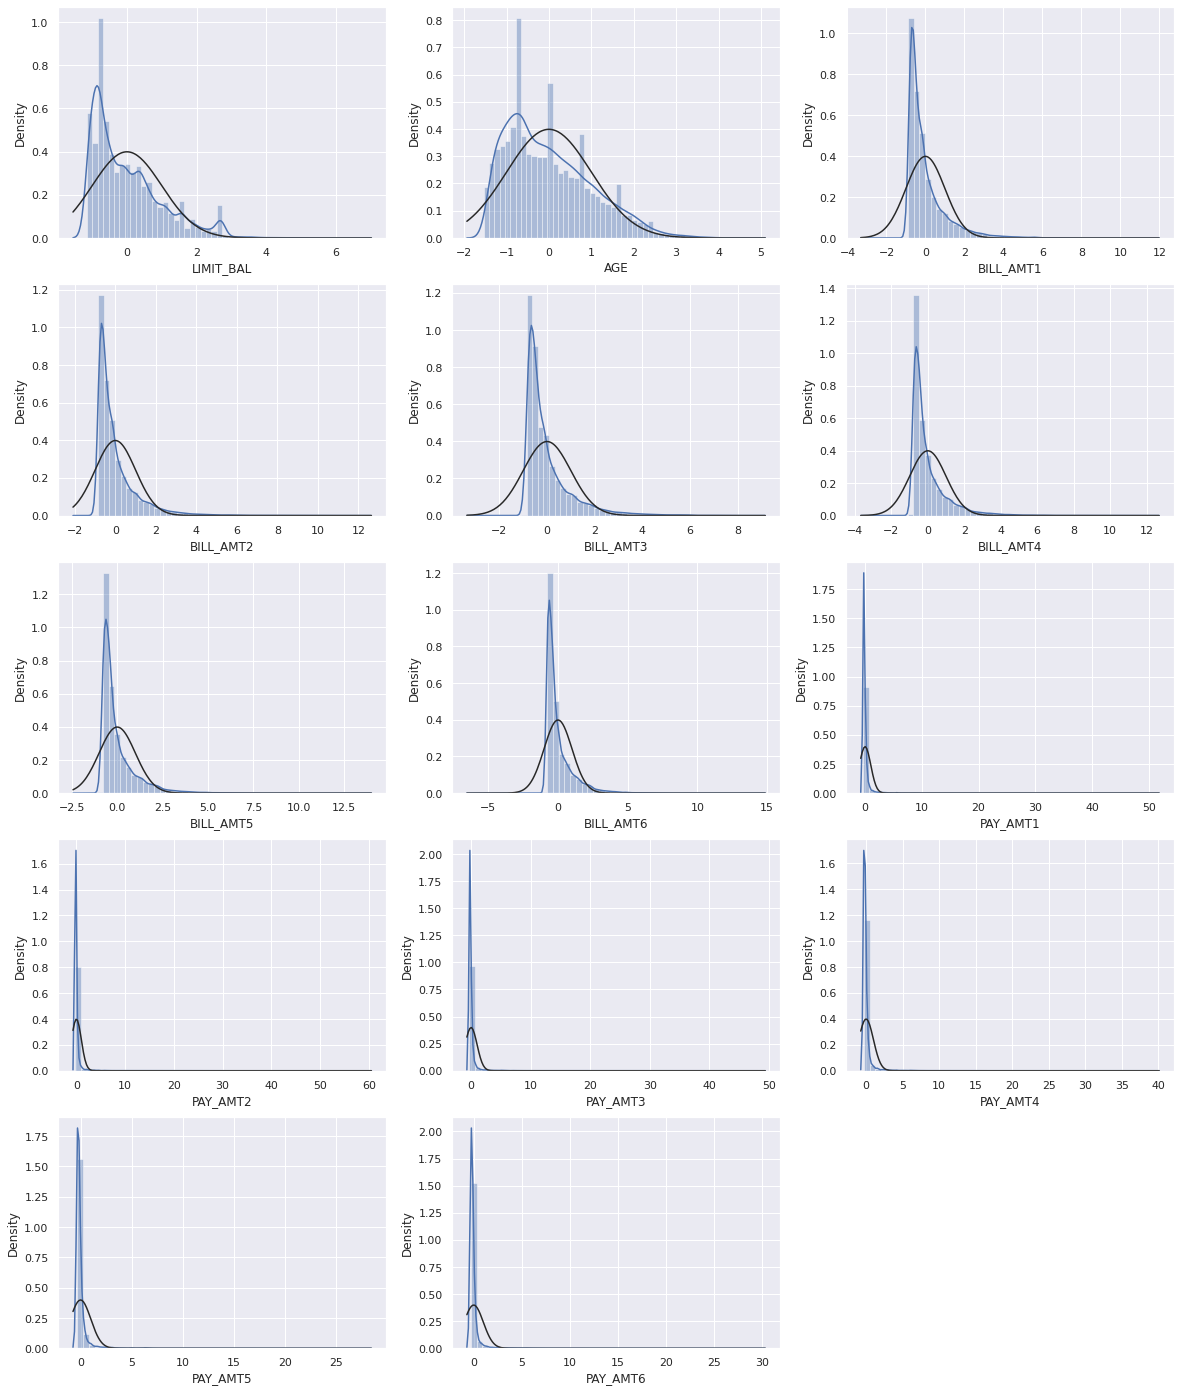

In [68]:
#column = df.columns.tolist()[1:24]  
fig = plt.figure(figsize=(20, 40)) 
for i in range(len(num_col)):
    plt.subplot(8, 3, i + 1)   
    sns.distplot(df[num_col[i]],fit=stats.norm) 
plt.show()

In [69]:
df['Default'].value_counts().tolist()

[18054, 5385]

In [70]:
df[cat_col]

,SEX,EDUCATION,MARRIAGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6
1,2,2,2,-1,2,0,0,0,2
2,2,2,2,0,0,0,0,0,0
3,2,2,1,0,0,0,0,0,0
4,1,2,1,-1,0,-1,0,0,0
5,1,1,2,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...
29995,1,3,1,0,0,0,0,0,0
29996,1,3,2,-1,-1,-1,-1,0,0
29997,1,2,2,4,3,2,-1,0,0
29998,1,3,1,1,-1,0,0,0,-1


In [58]:
df[num_col]

,LIMIT_BAL,AGE,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6
1,120000,26,2682,1725,2682,3272,3455,3261,0,1000,1000,1000,0,2000
2,90000,34,29239,14027,13559,14331,14948,15549,1518,1500,1000,1000,1000,5000
3,50000,37,46990,48233,49291,28314,28959,29547,2000,2019,1200,1100,1069,1000
4,50000,57,8617,5670,35835,20940,19146,19131,2000,36681,10000,9000,689,679
5,50000,37,64400,57069,57608,19394,19619,20024,2500,1815,657,1000,1000,800
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,220000,39,188948,192815,208365,88004,31237,15980,8500,20000,5003,3047,5000,1000
29996,150000,43,1683,1828,3502,8979,5190,0,1837,3526,8998,129,0,0
29997,30000,37,3565,3356,2758,20878,20582,19357,0,0,22000,4200,2000,3100
29998,80000,41,-1645,78379,76304,52774,11855,48944,85900,3409,1178,1926,52964,1804


## Model building

In [172]:
#X_train, X_test, y_train, y_test = train_test_split(X_tree, y, test_size = 0.2, random_state = 42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)
X_train, X_val, y_train, y_val = train_test_split(X_train,y_train, test_size = 0.2, random_state = 42 ) 

In [173]:
X_train

,LIMIT_BAL,AGE,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,SEX,EDUCATION,MARRIAGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6
22703,0.656167,-0.459371,1.437966,1.558012,1.678369,2.521733,2.632123,2.922782,0.113794,0.041861,2.443301,-0.328454,0.747399,-0.308275,2,2,2,0,0,0,0,2,2
23510,-0.834574,-0.351841,-0.721207,-0.726302,-0.615216,-0.619961,-0.586077,-0.524425,-0.271470,0.088946,-0.132468,-0.186585,0.128480,-0.147373,2,1,2,0,0,0,0,0,0
22195,-0.677654,-0.674432,0.172172,0.208329,0.163506,0.231882,0.301865,0.327472,-0.182563,-0.155147,-0.137310,-0.134996,-0.137664,-0.153672,2,1,2,0,0,0,0,0,0
13772,-0.834574,-0.674432,-0.208806,-0.174508,-0.654466,-0.656630,-0.641189,-0.649410,-0.221978,-0.222672,-0.280372,-0.296211,-0.270736,-0.251014,2,1,2,2,0,0,0,0,0
11629,-0.363814,1.368640,1.989462,0.674253,0.229946,-0.092887,-0.028122,0.018476,0.160500,-0.147661,-0.215059,-0.215926,-0.215445,-0.209100,2,2,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9954,-0.677654,-0.674432,0.123730,0.098288,0.077118,-0.444460,-0.137197,-0.094701,-0.360081,-0.159580,-0.252860,0.961264,-0.230814,-0.193754,1,1,2,1,2,0,0,0,0
11223,0.342327,-0.781962,0.021619,0.062483,0.115528,0.195594,0.286013,0.345010,-0.182563,-0.155147,-0.170324,-0.158727,-0.157625,-0.107863,2,2,2,0,0,0,0,0,0
4800,-0.834574,-1.427142,-0.194901,-0.164119,-0.126401,-0.131079,-0.103848,-0.548659,-0.229980,-0.203611,-0.197341,-0.193549,-0.269405,-0.249984,1,3,1,0,0,0,0,0,0
1493,0.028487,0.830990,-0.631333,-0.700183,-0.634779,-0.478212,-0.774803,-0.747502,0.086826,-0.056643,0.242353,-0.328454,-0.285374,-0.308275,1,2,2,-1,-1,0,0,0,-1


In [77]:
y

1        1
2        0
3        0
4        0
5        0
        ..
29995    0
29996    0
29997    1
29998    1
29999    1
Name: Default, Length: 23439, dtype: int64

### logtistic Regression

In [78]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

logistic = LogisticRegression(random_state = 42)
logistic.fit(X_train,y_train)
y_pred1 = logistic.predict(X_val)
acc_1 = accuracy_score(y_val, y_pred1)
print(confusion_matrix(y_val, y_pred1))
score1 = round(acc_1*100,4)
print('The accuracy score of logistic regression is {}%'.format(score1))


[[2713  160]
 [ 529  349]]
The accuracy score of logistic regression is 81.6316%


#### cross validation 


In [95]:
from sklearn.model_selection import cross_val_score
cross_val_score(logistic,X,y)

array([0.80396758, 0.80972696, 0.82551195, 0.83511092, 0.82974184])

In [98]:
clf_cross_val_score = np.mean(cross_val_score(logistic,X,y))
clf_cross_val_score
print(f"Corss-Validated Accuracy:{clf_cross_val_score*100:.2f}%")

Corss-Validated Accuracy:82.08%


#### ROC & AUC

In [100]:
y_pred_prob = logistic.predict_log_proba(X_test)
y_pred_prob

array([[-0.49455164, -0.94120933],
       [-0.14959236, -1.97370523],
       [-0.16017433, -1.9105109 ],
       ...,
       [-0.45382649, -1.00838665],
       [-0.22858041, -1.58798134],
       [-0.70868267, -0.67784935]])

In [102]:
from sklearn.metrics import roc_curve
fpr, tpr,thresholds = roc_curve(y_test,y_pred_prob[:,1])

In [104]:
# create a function for plotting ROC curves

def plot_roc_curve(fpr,tpr):
  plt.plot(fpr,tpr,color='orange',label = 'ROC')
  plt.plot([0,1],[0,1],color='darkblue',linestyle='--',label = 'Guessing')
  plt.xlabel('FPR')
  plt.ylabel('TPR')
  plt.title('ROC')
  plt.legend()
  plt.show()



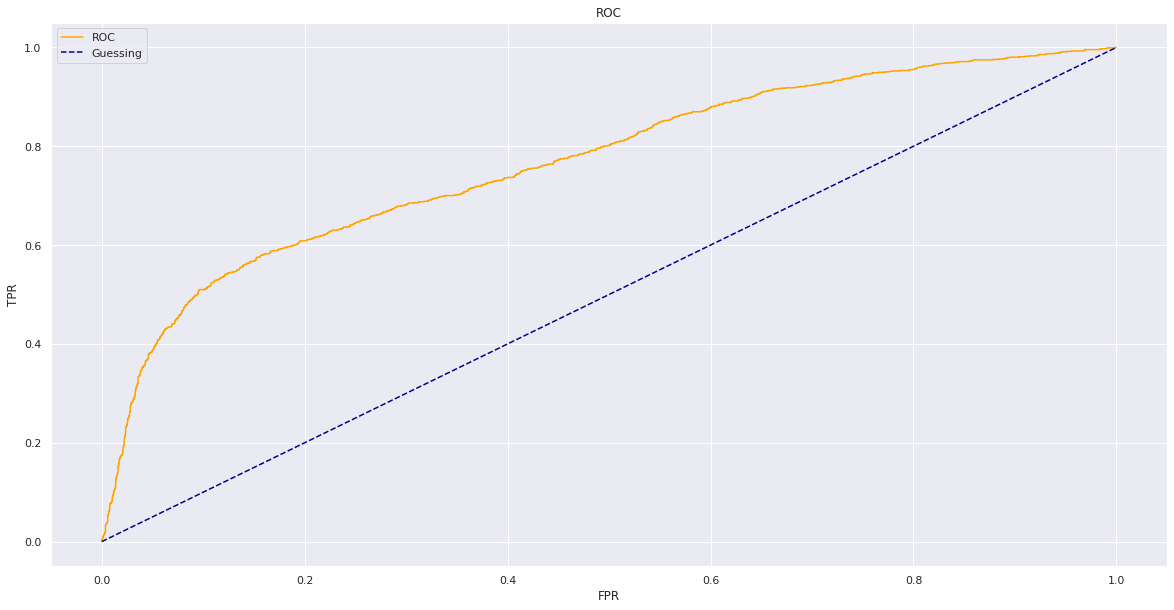

In [105]:
plot_roc_curve(fpr, tpr)

In [106]:
from sklearn.metrics import roc_auc_score
roc_auc_score(y_test,y_pred_prob[:,1]) # auc: area under the curve , the bigger, the better 

0.7675800891939492

#### Confusion Matrix


In [109]:
from sklearn.metrics import confusion_matrix
y_preds = logistic.predict(X_test)
conf_mat=confusion_matrix(y_test,y_preds)

In [110]:
pd.crosstab(y_test,
            y_preds,
            rownames=['Actual Labels'],
            colnames=['Predicted Labels'])

Predicted Labels,0,1
Actual Labels,,
0,3416,158
1,706,408


* TP:408
* TN:3416
* FP:158
* FN:706

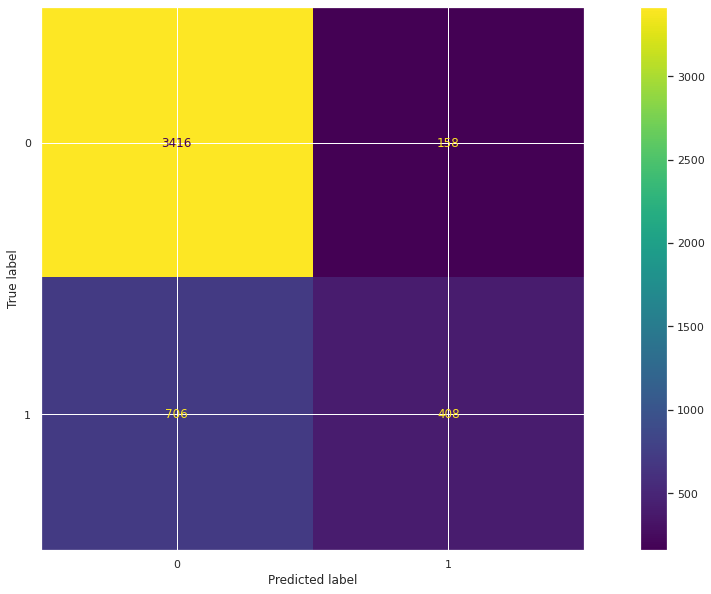

In [114]:
from sklearn.metrics import ConfusionMatrixDisplay
ConfusionMatrixDisplay.from_estimator(estimator=logistic,X=X_test,y=y_test)

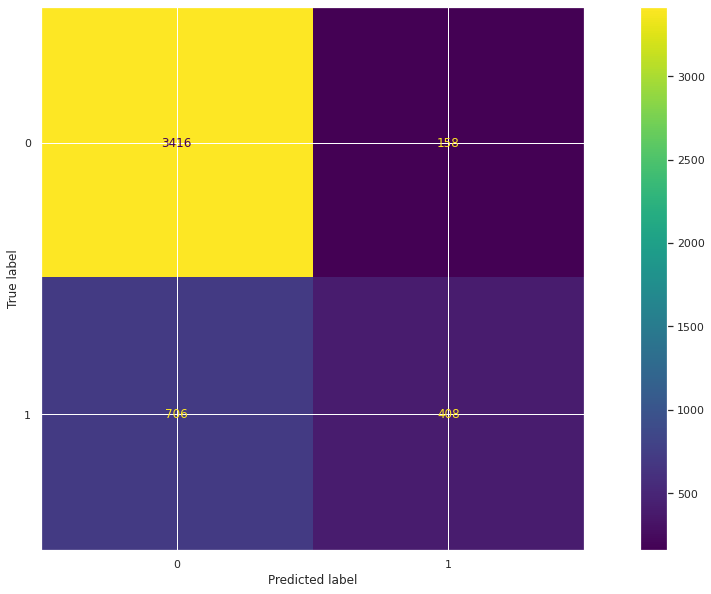

In [115]:
ConfusionMatrixDisplay.from_predictions(y_true=y_test,y_pred=y_preds)

#### Classification Report

In [120]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_preds))

              precision    recall  f1-score   support

           0       0.83      0.96      0.89      3574
           1       0.72      0.37      0.49      1114

    accuracy                           0.82      4688
   macro avg       0.77      0.66      0.69      4688
weighted avg       0.80      0.82      0.79      4688



In [154]:
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score
def evaluate_preds(y_true,y_preds):
  """
  performs evaluation comparison on y_true labels vs y_pred labels
  on a classification
  """
  accuracy = accuracy_score(y_true,y_preds)
  precision = precision_score(y_true,y_preds)
  recall = recall_score(y_true,y_preds,average='weighted')
  f1 = f1_score(y_true,y_preds,average='weighted')
  metric_dict = {
      "accuracy":round(accuracy,2),
      "precision": round(precision,2),
      "recall":round(recall,2),
      "f1":round(f1,2)
  }
  print(f"Accuracy:{accuracy * 100:.2f}%")
  print(f"precision:{precision:.2f}")
  print(f"recall:{recall:.2f}")
  print(f"f1 score:{f1:.2f}")
  return metric_dict

In [156]:
logistic_metrics = evaluate_preds(y_test,y_preds)

Accuracy:81.57%
precision:0.72
recall:0.82
f1 score:0.79


### Randon Tree base line

In [175]:
from sklearn.ensemble import RandomForestClassifier
random_forest = RandomForestClassifier(n_estimators =100)
random_forest.fit(X_train, y_train)

ye = random_forest.predict(X_train)
print(accuracy_score(y_train, ye))
y_preds_rs =  random_forest.predict(X_test)
rs_baseline = evaluate_preds(y_test,y_preds_rs)
 

1.0
Accuracy:81.61%
precision:0.69
recall:0.82
f1 score:0.80


### Tuning hyperparameter

In [123]:
random_forest.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 42,
 'verbose': 0,
 'warm_start': False}

#### RandomizedSearchCV

In [176]:
from sklearn.model_selection import RandomizedSearchCV

#setup Grid
grid ={
    'n_estimators': [10,100,200,500,1000,1200],
    'max_depth': [None,5,10,20,30],
     'max_features': ['auto','sqrt'],
      'min_samples_leaf': [2,4,6],
      'min_samples_split':[1,2,4] 
}
#instantiate RandomForestClassifier
clf = RandomForestClassifier(n_jobs=1)

#setup RandomizedSearchCV
rs_clf = RandomizedSearchCV(estimator=clf ,
                            param_distributions= grid,
                            n_iter=10,
                            cv = 5,
                            verbose = 2 )

#Fit data
rs_clf.fit(X_train,y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] END max_depth=5, max_features=auto, min_samples_leaf=4, min_samples_split=4, n_estimators=10; total time=   0.1s
[CV] END max_depth=5, max_features=auto, min_samples_leaf=4, min_samples_split=4, n_estimators=10; total time=   0.1s
[CV] END max_depth=5, max_features=auto, min_samples_leaf=4, min_samples_split=4, n_estimators=10; total time=   0.1s
[CV] END max_depth=5, max_features=auto, min_samples_leaf=4, min_samples_split=4, n_estimators=10; total time=   0.1s
[CV] END max_depth=5, max_features=auto, min_samples_leaf=4, min_samples_split=4, n_estimators=10; total time=   0.2s
[CV] END max_depth=20, max_features=sqrt, min_samples_leaf=4, min_samples_split=4, n_estimators=1200; total time=  39.5s
[CV] END max_depth=20, max_features=sqrt, min_samples_leaf=4, min_samples_split=4, n_estimators=1200; total time=  39.0s
[CV] END max_depth=20, max_features=sqrt, min_samples_leaf=4, min_samples_split=4, n_estimators=1200; total

RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(n_jobs=1),
                   param_distributions={'max_depth': [None, 5, 10, 20, 30],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [2, 4, 6],
                                        'min_samples_split': [1, 2, 4],
                                        'n_estimators': [10, 100, 200, 500,
                                                         1000, 1200]},
                   verbose=2)

In [141]:
rs_clf.best_params_

{'n_estimators': 100,
 'min_samples_split': 4,
 'min_samples_leaf': 4,
 'max_features': 'auto',
 'max_depth': 5}

In [165]:
rs_y_preds = rs_clf.predict(X_test)

rs_metrics = evaluate_preds(y_test,rs_y_preds)

Accuracy:81.31%
precision:0.72
recall:0.81
f1 score:0.79


#### GridSearchCV

In [178]:
from sklearn.model_selection import GridSearchCV

#setup Grid
grid_2 ={
    'n_estimators': [10,100,500,],
    'max_depth': [None],
     'max_features': ['auto','sqrt'],
      'min_samples_leaf': [6],
      'min_samples_split':[1,2] 
}
#instantiate RandomForestClassifier
clf = RandomForestClassifier(n_jobs=1)

#setup RandomizedSearchCV
gs_clf = GridSearchCV(estimator=clf ,
                            param_grid= grid_2,
                            cv = 5,
                            verbose = 0 )

#Fit data
gs_clf.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(n_jobs=1),
             param_grid={'max_depth': [None], 'max_features': ['auto', 'sqrt'],
                         'min_samples_leaf': [6], 'min_samples_split': [1, 2],
                         'n_estimators': [10, 100, 500]})

In [158]:
gs_y_preds = gs_clf.predict(X_test)

gs_metrics = evaluate_preds(y_test,gs_y_preds)


Accuracy:81.66%
precision:0.72
recall:0.82
f1 score:0.79


### Compare model

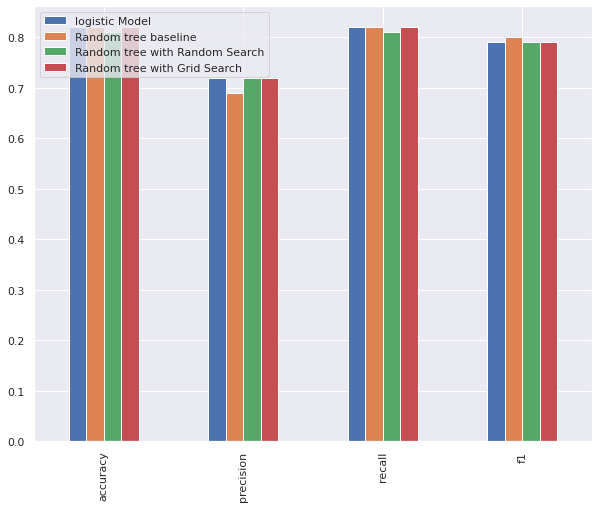

In [179]:
compare_metrics = pd.DataFrame({
    "logistic Model": logistic_metrics,
    "Random tree baseline":rs_baseline,
    "Random tree with Random Search": rs_metrics,
    "Random tree with Grid Search": gs_metrics
})

compare_metrics.plot.bar(figsize=(10,8));

## Other model 

### k nearest neighbour

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

k_neighbors = KNeighborsClassifier()
k_neighbors.fit(X_train,y_train)
y_pred2 = k_neighbors.predict(X_val)
acc_2 = accuracy_score(y_val, y_pred2)
score2 = round(acc_2*100,4)
print('The accuracy score of k nearest neighbors is {}%'.format(score2))

The accuracy score of k nearest neighbors is 78.859%


### Naive Bayes

In [ ]:
from sklearn.naive_bayes import GaussianNB
naive_bayes = GaussianNB()
naive_bayes.fit(X_train,y_train)
y_pred3 = naive_bayes.predict(X_val)
acc_3 = accuracy_score(y_val, y_pred3)
score3 = round(acc_3*100,4)
print('The accuracy score Naive bayes is {}%'.format(score3))

The accuracy score Naive bayes is 79.5521%


### Decision tree

In [ ]:
from sklearn.tree import DecisionTreeClassifier
decision_tree = DecisionTreeClassifier()
decision_tree.fit(X_train,y_train)
y_pred4 = decision_tree.predict(X_val)
acc_4 = accuracy_score(y_val, y_pred4)
score4 = round(acc_4*100,4)
print('The accuracy score of Decision tree is {}%'.format(score4))

The accuracy score of Decision tree is 72.9139%


In [ ]:
importance_dt_df = pd.DataFrame({'feature':X_train.columns,
                            'Importance': decision_tree.feature_importances_}).sort_values('Importance', ascending = False)

importance_dt_df.head(10)

,feature,Importance
26,PAY_0_2,0.154549
10,PAY_AMT3,0.065001
9,PAY_AMT2,0.059194
1,AGE,0.057041
7,BILL_AMT6,0.056332
13,PAY_AMT6,0.053684
6,BILL_AMT5,0.048131
11,PAY_AMT4,0.047858
8,PAY_AMT1,0.047761
2,BILL_AMT1,0.047705


In [ ]:
from sklearn.model_selection import GridSearchCV

parameters = {'splitter':('best','random')
              ,'criterion':("gini","entropy")
              ,"max_depth":[*range(1,10)]
              ,'min_samples_leaf':[*range(1,50,5)]
}


In [ ]:
decision_tree = DecisionTreeClassifier(random_state=25)
GS = GridSearchCV(decision_tree, parameters, cv=10) # cv交叉验证
GS.fit(X_train,y_train)
GS.best_params_

{'criterion': 'entropy',
 'max_depth': 6,
 'min_samples_leaf': 6,
 'splitter': 'best'}

GS.best_score_ 

0.8245333333333333

In [ ]:
importance_df = pd.DataFrame({'feature':X_train.columns,
                            'Importance': random_forest.feature_importances_}).sort_values('Importance', ascending = False)

importance_df.head(10)

,feature,Importance
26,PAY_0_2,0.069272
2,BILL_AMT1,0.053217
4,BILL_AMT3,0.051581
8,PAY_AMT1,0.050960
5,BILL_AMT4,0.050308
3,BILL_AMT2,0.050180
7,BILL_AMT6,0.049424
9,PAY_AMT2,0.049194
6,BILL_AMT5,0.049179
10,PAY_AMT3,0.046663


Text(0.5, 1.0, 'Feature Importance')

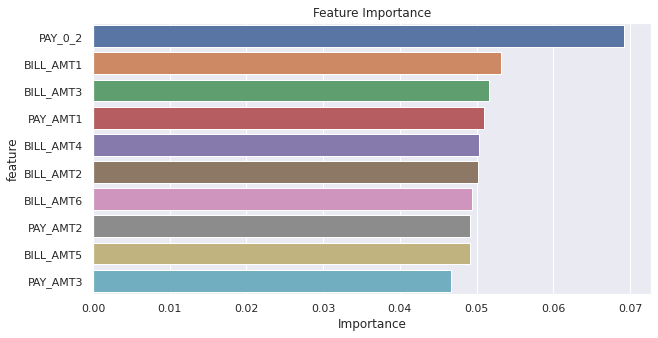

In [ ]:
plt.figure(figsize=(10,5))

sns.barplot(data = importance_df.head(10), x = 'Importance', y = 'feature');
plt.title('Feature Importance')

In [ ]:
X

,LIMIT_BAL,AGE,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,SEX_1,SEX_2,EDUCATION_1,EDUCATION_2,EDUCATION_3,EDUCATION_4,MARRIAGE_1,MARRIAGE_2,MARRIAGE_3,PAY_0_-1,PAY_0_0,PAY_0_1,PAY_0_2,PAY_0_3,PAY_0_4,PAY_0_5,PAY_0_6,PAY_0_7,PAY_0_8,PAY_2_-1,PAY_2_0,PAY_2_1,PAY_2_2,PAY_2_3,PAY_2_4,PAY_2_5,PAY_2_6,PAY_2_7,PAY_2_8,PAY_3_-1,PAY_3_0,PAY_3_1,PAY_3_2,PAY_3_3,PAY_3_4,PAY_3_5,PAY_3_6,PAY_3_7,PAY_3_8,PAY_4_-1,PAY_4_0,PAY_4_1,PAY_4_2,PAY_4_3,PAY_4_4,PAY_4_5,PAY_4_6,PAY_4_7,PAY_4_8,PAY_5_-1,PAY_5_0,PAY_5_2,PAY_5_3,PAY_5_4,PAY_5_5,PAY_5_6,PAY_5_7,PAY_5_8,PAY_6_-1,PAY_6_0,PAY_6_2,PAY_6_3,PAY_6_4,PAY_6_5,PAY_6_6,PAY_6_7,PAY_6_8
1,-0.285353,-0.997022,-0.756849,-0.772020,-0.756577,-0.735975,-0.721212,-0.708230,-0.360377,-0.253651,-0.252860,-0.263968,-0.337272,-0.193754,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
2,-0.520734,-0.136781,-0.415877,-0.609000,-0.606832,-0.573899,-0.542941,-0.513724,-0.270403,-0.229025,-0.252860,-0.263968,-0.270736,-0.021972,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,-0.834574,0.185809,-0.187968,-0.155717,-0.114906,-0.368969,-0.325612,-0.292151,-0.241834,-0.203464,-0.241855,-0.257519,-0.266145,-0.251014,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,-0.834574,2.336411,-0.680648,-0.719743,-0.300156,-0.477040,-0.477824,-0.457025,-0.241834,1.503712,0.242353,0.251919,-0.291429,-0.269395,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,-0.834574,0.185809,0.035563,-0.038627,-0.000405,-0.499697,-0.470488,-0.442890,-0.212199,-0.213511,-0.271733,-0.263968,-0.270736,-0.262467,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,0.499247,0.400870,1.634663,1.760217,2.075082,0.505824,-0.290278,-0.506902,0.143430,0.682138,-0.032600,-0.131965,-0.004592,-0.251014,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
29996,-0.049973,0.830990,-0.769675,-0.770655,-0.745288,-0.652335,-0.694300,-0.759848,-0.251495,-0.129241,0.187219,-0.320135,-0.337272,-0.308275,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
29997,-0.991494,0.185809,-0.745512,-0.750407,-0.755530,-0.477948,-0.455550,-0.453448,-0.360377,-0.302904,0.902637,-0.05

In [ ]:
X_selected = X[['LIMIT_BAL',	'AGE',	'BILL_AMT1',	'PAY_AMT1',	'SEX_1',	'SEX_2',	'EDUCATION_1',	'EDUCATION_2',	'EDUCATION_3',	'EDUCATION_4',	'MARRIAGE_1',	'MARRIAGE_2',	'MARRIAGE_3',	'PAY_0_-1',	'PAY_0_0',	'PAY_0_1',	'PAY_0_2',	'PAY_0_3',	'PAY_0_4',	'PAY_0_5',	'PAY_0_6',	'PAY_0_7'	]]
X_selected

,LIMIT_BAL,AGE,BILL_AMT1,PAY_AMT1,SEX_1,SEX_2,EDUCATION_1,EDUCATION_2,EDUCATION_3,EDUCATION_4,MARRIAGE_1,MARRIAGE_2,MARRIAGE_3,PAY_0_-1,PAY_0_0,PAY_0_1,PAY_0_2,PAY_0_3,PAY_0_4,PAY_0_5,PAY_0_6,PAY_0_7
1,-0.285353,-0.997022,-0.756849,-0.360377,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,-0.520734,-0.136781,-0.415877,-0.270403,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,-0.834574,0.185809,-0.187968,-0.241834,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,-0.834574,2.336411,-0.680648,-0.241834,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,-0.834574,0.185809,0.035563,-0.212199,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,0.499247,0.400870,1.634663,0.143430,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
29996,-0.049973,0.830990,-0.769675,-0.251495,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
29997,-0.991494,0.185809,-0.745512,-0.360377,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
29998,-0.599194,0.615930,-0.812404,4.731036,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0


### logistic model with selected features

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_selected, y, test_size = 0.2, random_state = 42)
X_train, X_val, y_train, y_val = train_test_split(X_train,y_train, test_size = 0.2, random_state = 42 ) 

In [ ]:
logistic = LogisticRegression(random_state = 42)
logistic.fit(X_train,y_train)
y_pred1 = logistic.predict(X_val)
acc_1 = accuracy_score(y_val, y_pred1)
print(confusion_matrix(y_val, y_pred1))
score1 = round(acc_1*100,4)
print('The accuracy score of logistic regression is {}%'.format(score1))

[[2742  131]
 [ 569  309]]
The accuracy score of logistic regression is 81.3383%


In [ ]:
from sklearn.model_selection import cross_val_score
cross_val_score(logistic,X,y)

In [ ]:
from sklearn.tree import DecisionTreeClassifier
decision_tree = DecisionTreeClassifier()
decision_tree.fit(X_train,y_train)
y_pred4 = decision_tree.predict(X_val)
acc_4 = accuracy_score(y_val, y_pred4)
score4 = round(acc_4*100,4)
print('The accuracy score of Decision tree is {}%'.format(score4))

The accuracy score of Decision tree is 71.7675%
